# 3ème Challenge

In [2]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import animation
import matplotlib.cm as cm
from JSAnimation.IPython_display import display_animation
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

- Tout d'abord, nous allons reprendre toutes les fonctions définies dans le notebook Ising Model afin de nous en servir dans nos challenges.

In [3]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    """ Computes the contribution to the energy for a given spin
    at location ix,iy for a lattice with periodic boundary conditions
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    sigma   : int
        spin at site ix,iy
    ix   : int
        location in x
    iy   : int
        location in y
    
   
    Returns:
    -------
    energy: energy for the given configuration
    """
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy


In [4]:
def metropolis_at_site(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    ix   : int
        location in x
    iy   : int
        location in y
    """
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

In [5]:
def initial_state(nx,ny):
    """ Creates a lattice with random spin orientations
   
    Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
   
    Returns:
    -------
    r: 2D array of spins
    """
       
    # Uniform random spins between 0 and 1  
    r = numpy.random.random_integers(0,1,(nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] =-1

    return r

In [6]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    """ Creates a sequence of states for the Ising model using
    the Metropolis algorithm
   
    Parameters:
    ----------
    sp   : initial lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    states: sequence of states
    """
    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.random_integers(0,nx-1)
            iy=numpy.random.random_integers(0,ny-1)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

Nous allons faire un graphique montrant l'évolution de la magnétisation et de l'énergie moyennes en fonction du paralètre $\alpha$.

In [7]:
def resol (sp, N, NMC, nx, ny) :

    moy = numpy.empty(N-1)
    alfa = numpy.empty(N-1)
    magneti = numpy.empty(N-1)
    
    for i in range(1,N) :
        alpha = i/N
        sp = numpy.ones([nx,ny])
        x = ising_model_metropolis(sp, NMC, nx, ny, alpha)
        y = x[NMC]
        energy = 0
        magnet = 0
        for ix in range (nx) :
            for iy in range (ny) :
                energy_k = energy_at_site(y,alpha,y[ix,iy],ix,iy)
                magnet = magnet + y[ix,iy]
                energy = energy + energy_k
        moy [i-1] = energy/(nx*ny)
        alfa [i-1] = alpha
        magneti [i-1] = magnet/(nx*ny)
    
    return (moy,magneti,alfa)

Pour avoir une bonne idée du $\alpha \in [0,1]$ auquel la transition de phase s'opère, nous calculons par pas de $0.01$. Comme état initial, nous prenons tous les spins dans l'état |$\uparrow>$.

In [10]:
N=100
nx = 100
ny = 100
sp = numpy.ones([nx,ny])
NMC=50

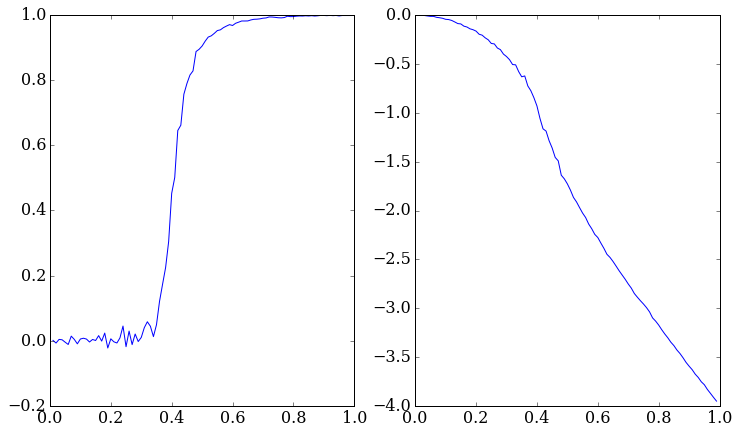

In [11]:
moy,magneti,alfa = resol (sp, N, NMC, nx, ny)

pyplot.figure(figsize=(12,7))
pyplot.subplot(1, 2, 1)
pyplot.plot(alfa,magneti)
pyplot.subplot(1, 2, 2)
pyplot.plot(alfa,moy)

Le graphique à gauche représente la magnétisation moyenne et à droite l'énergie moyenne en fonction de $\alpha$.
On remarque d'abord que la magnétisation suit un plateau assez agité (dû à un $\alpha$ faible, ce qui signifie une température et une agitation élevée). Ensuite, la transition s'opère brutalement aux environs de $\alpha$ valant $0.4$ - $0.42$ pour après arriver à un nouveau plateau plus calme car $\alpha$ est grand (température faible).
Pour l'énergie, lorsque $\alpha \rightarrow 1$, l'énergie tend de manière linéaire vers -4.

- Dans cette deuxième partie, nous allons partir de conditions initiales différentes. Nous allons prendre tous les spins orientés vers le haut sur les bords et aléatoirement au centre et puis voir l'évolution du système pour des $\alpha$ différents.

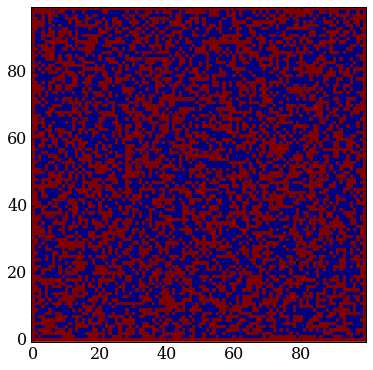

In [12]:
#Etat initial
sp = numpy.random.random_integers(0,1,(nx,ny))
for i in range(nx) :
    sp[i,0] = 1
    sp[i,-1] = 1
for i in range(ny) :
    sp[0,i] = 1
    sp[-1,i] = 1
sp[sp==0] =-1
sp2 = sp.copy()
pyplot.figure(figsize=(6,6))
pyplot.imshow(sp,interpolation="none",origin='lower')

Voilà notre état initial. Maintenant nous allons prendre un $\alpha$ de $0.2$ et un autre de $0.7$.

In [13]:
#Le cas alpha=0.2
NMC=100
alpha=0.2
states_0_2 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

#Le cas alpha=0.7
alpha=0.7
states_0_7 = ising_model_metropolis(sp2, NMC, nx, ny, alpha)

Enfin, on anime les deux résultats pour voir l'évolution des systèmes et les comparer entre eux.


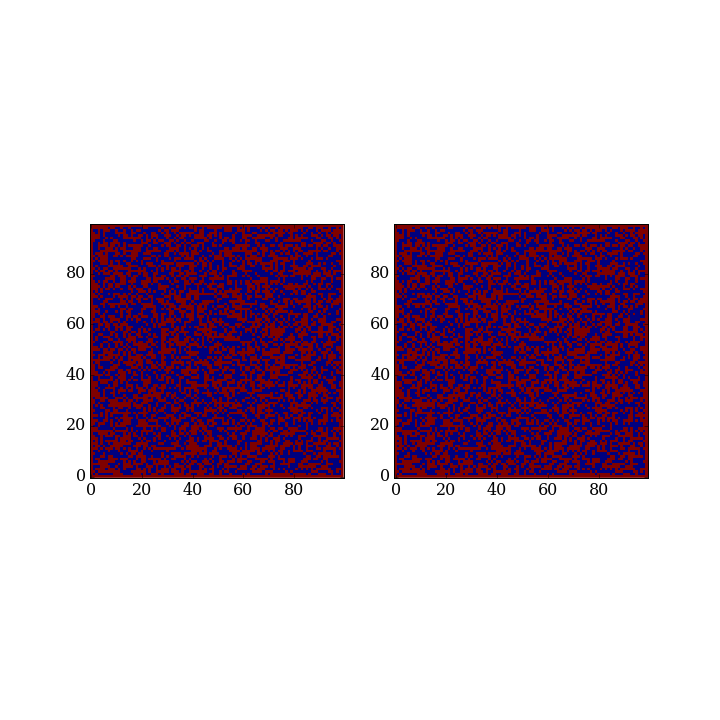
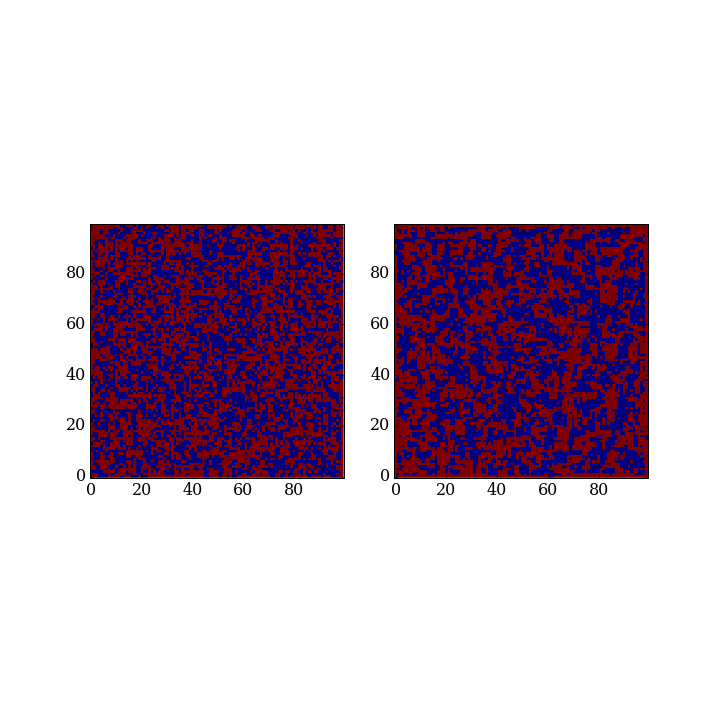
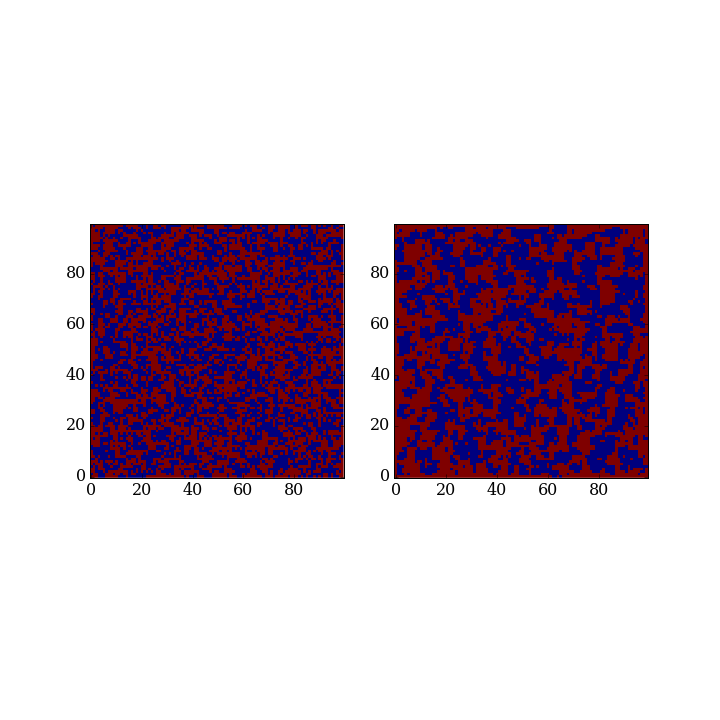
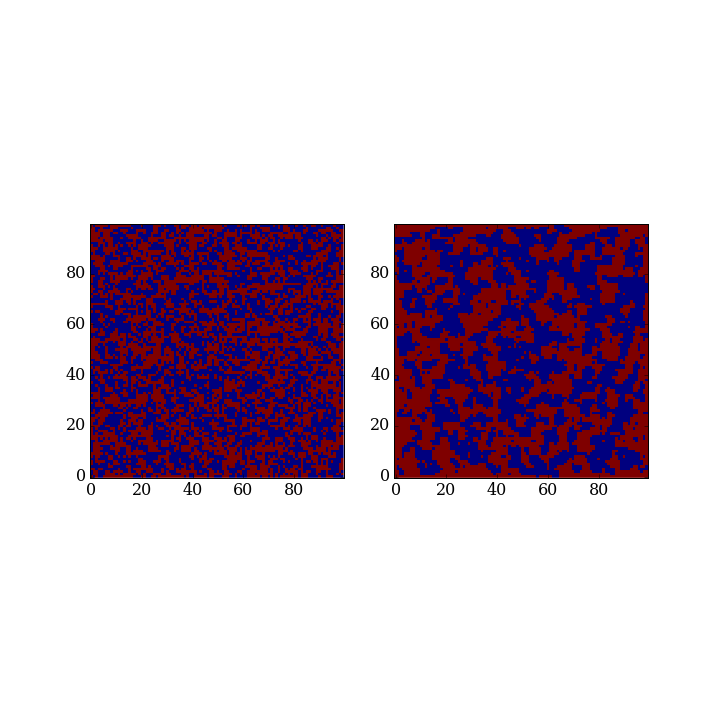
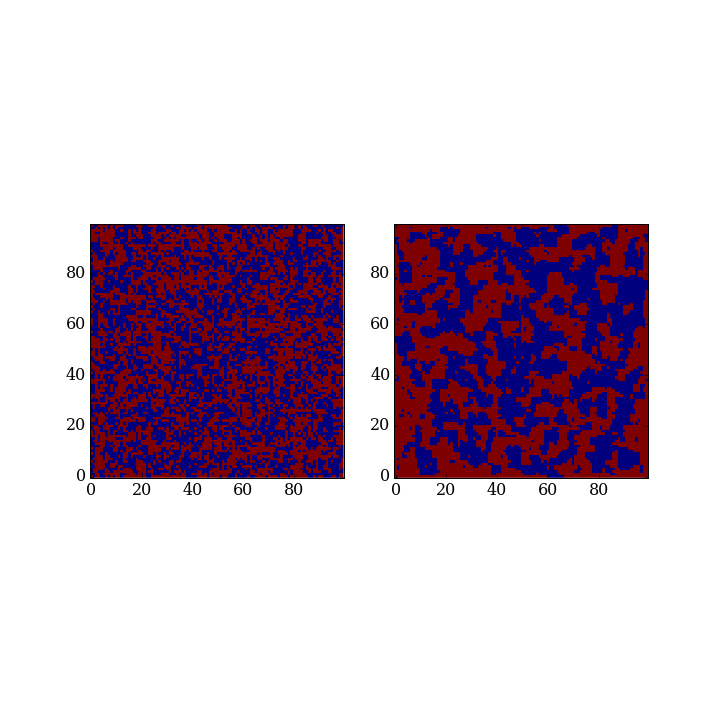
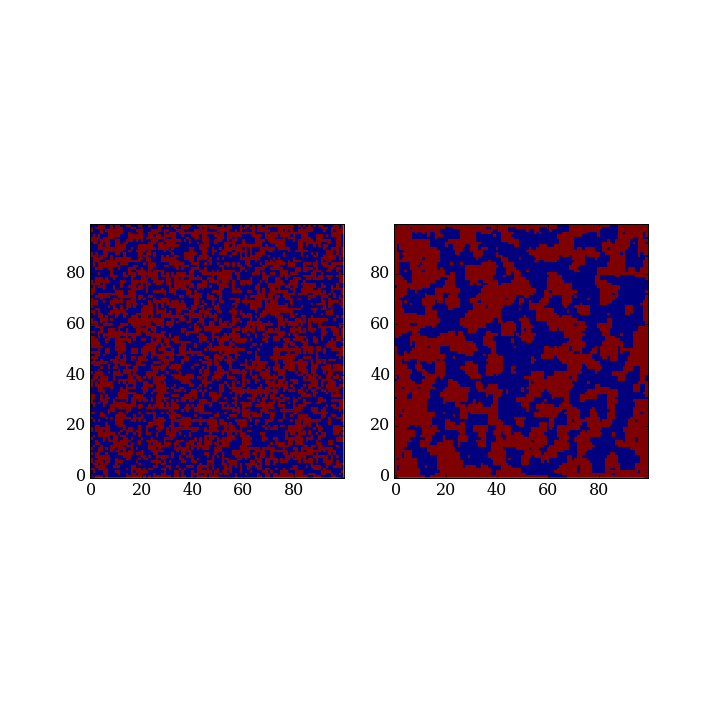
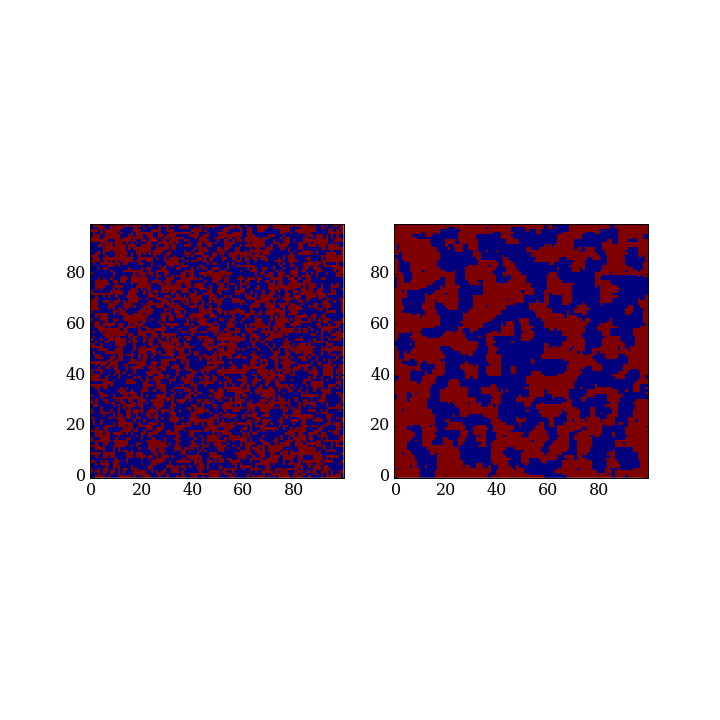
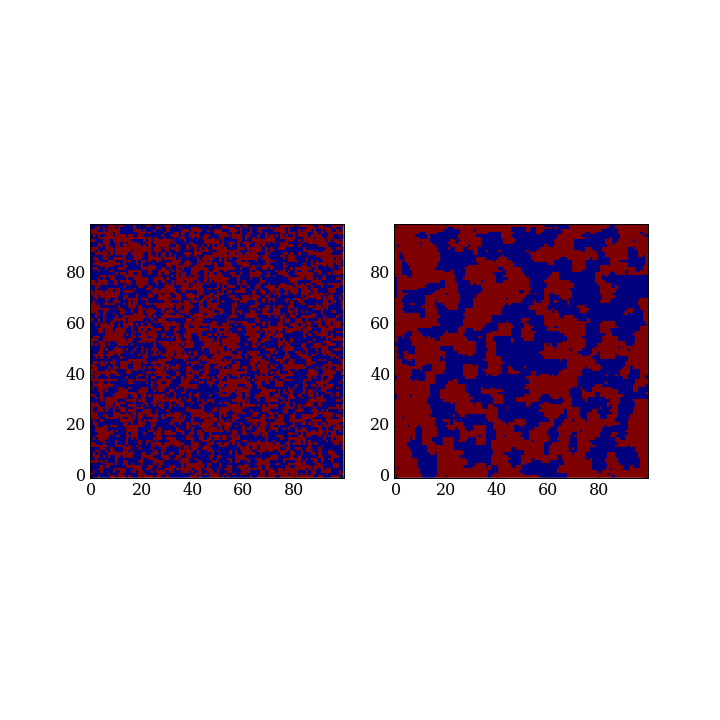
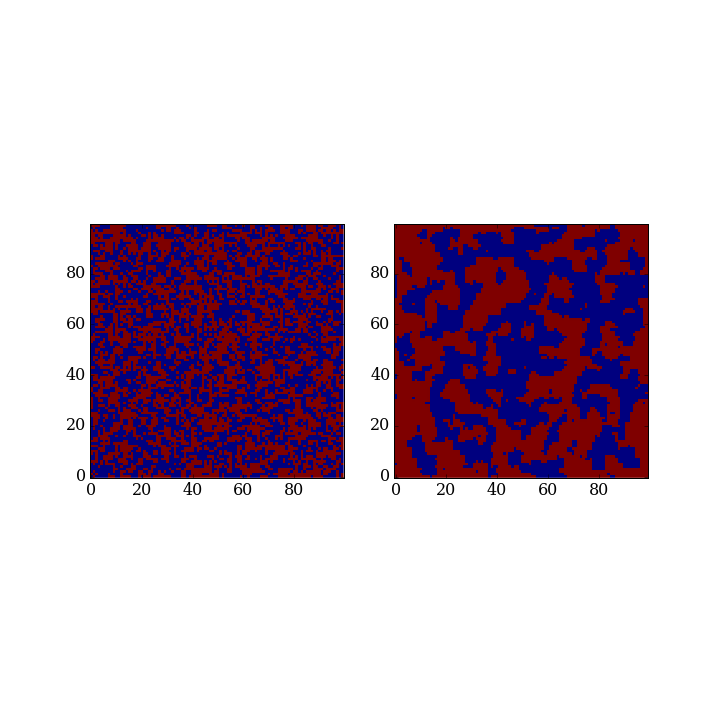
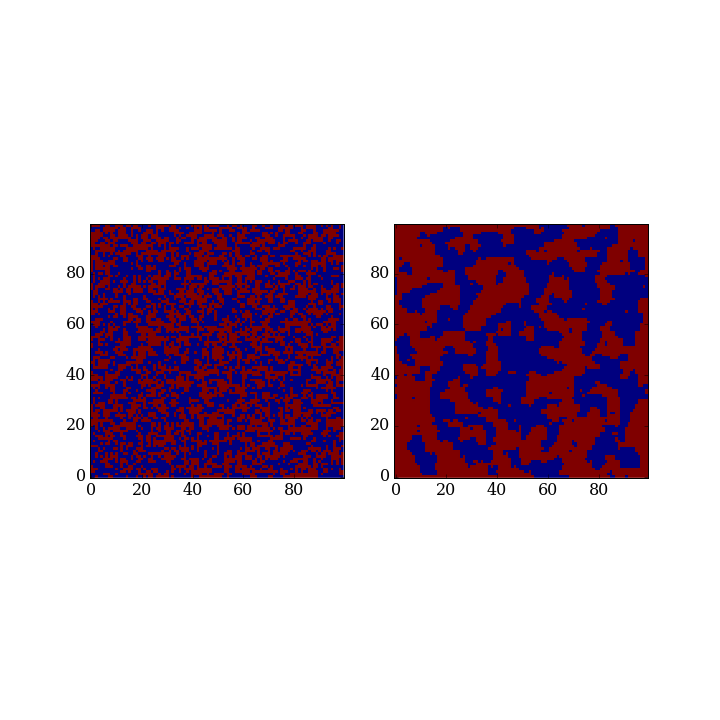
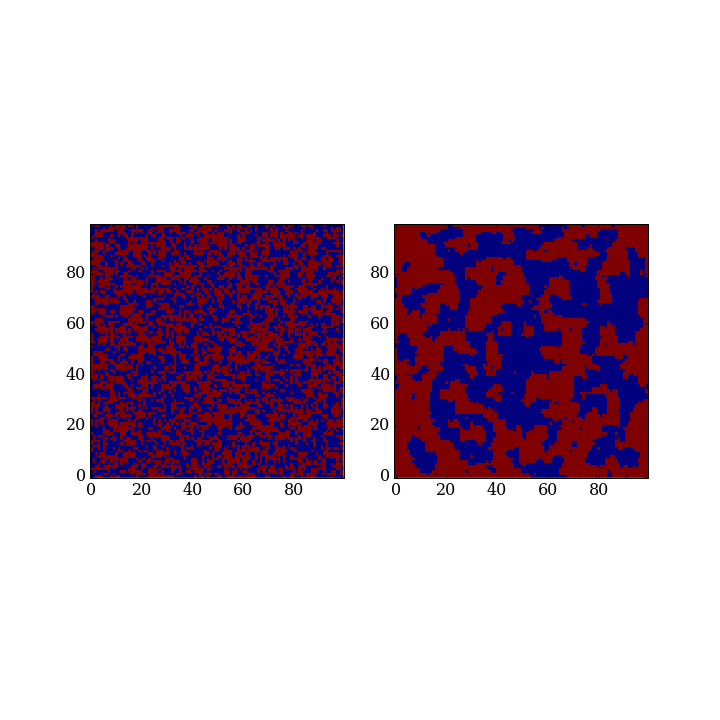
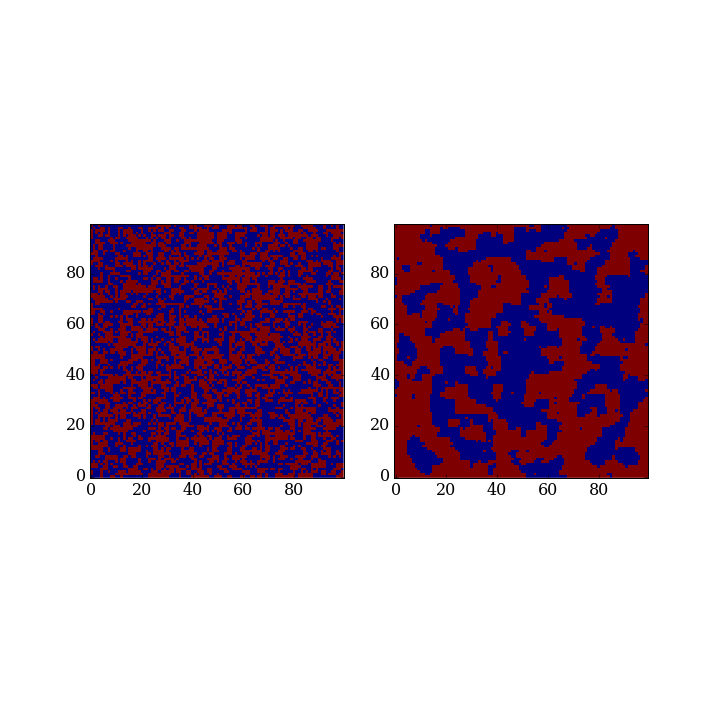
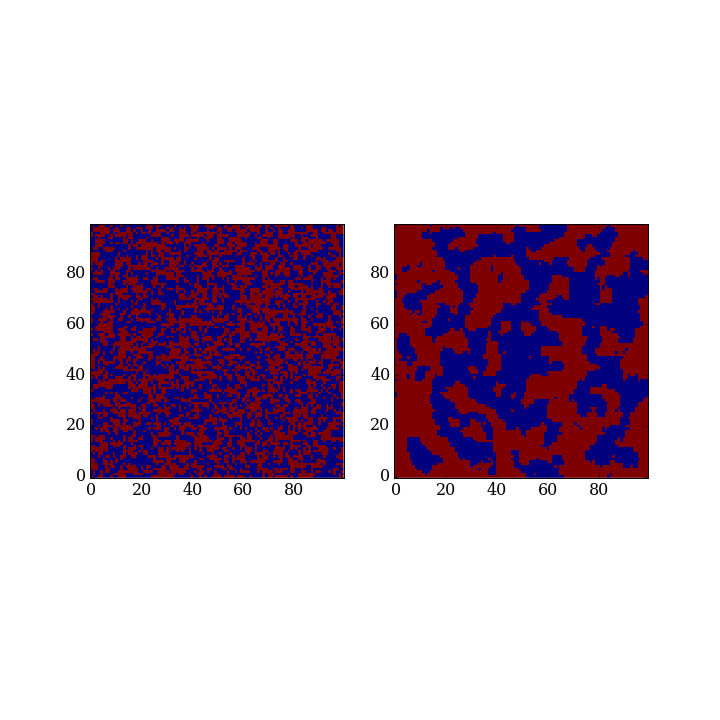
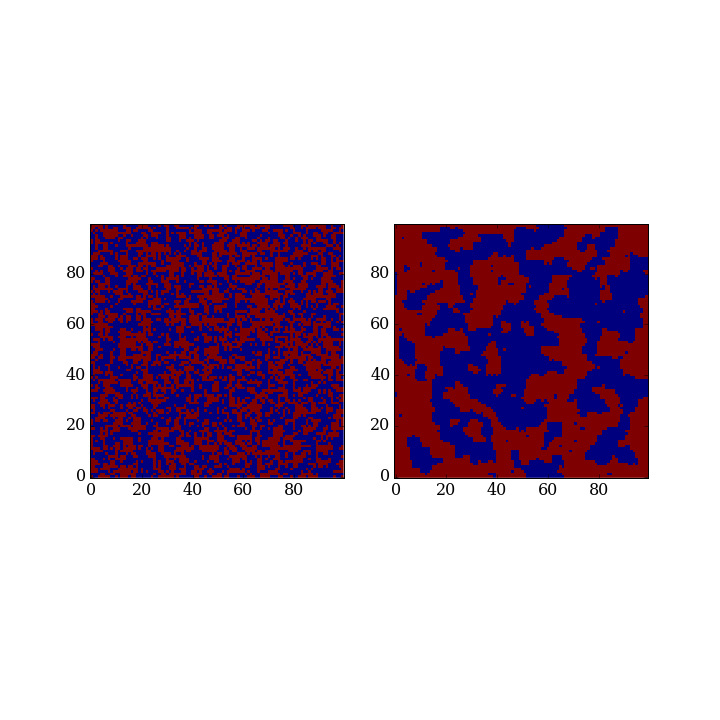
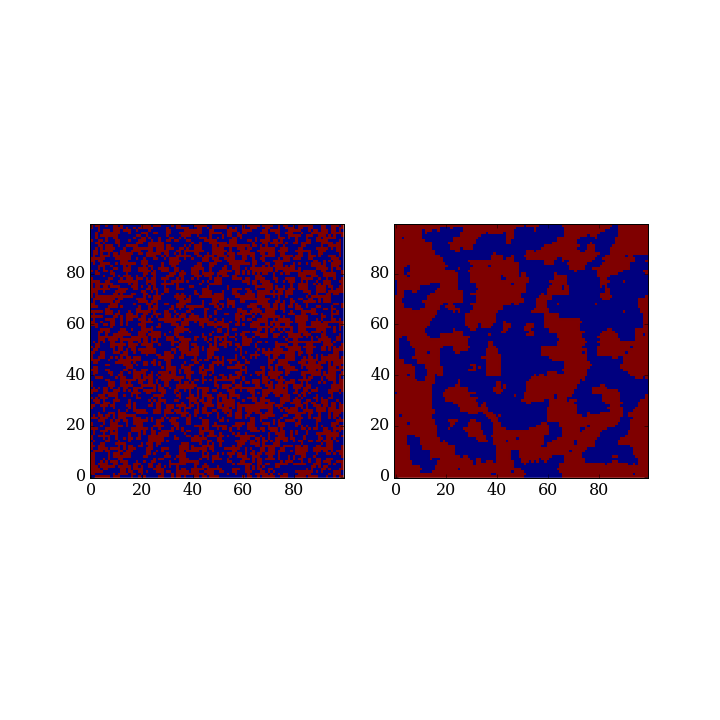
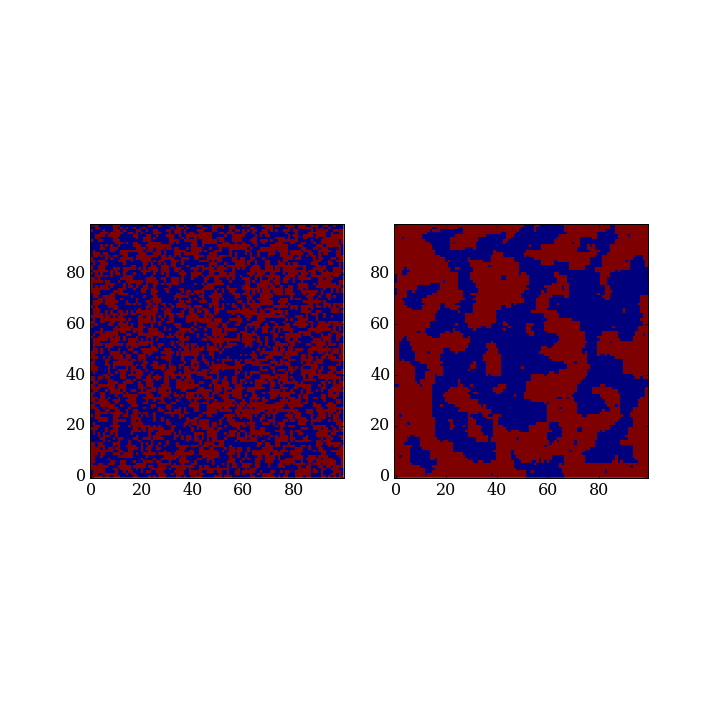
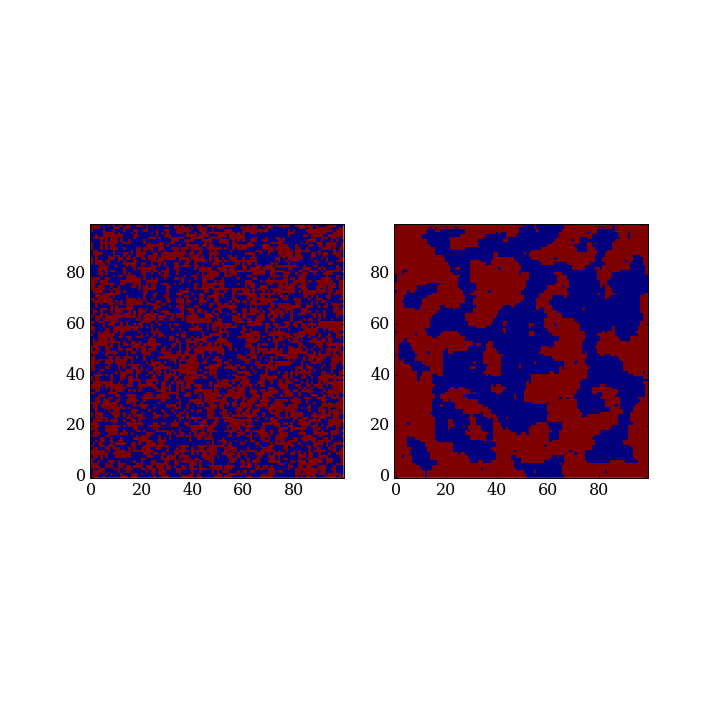
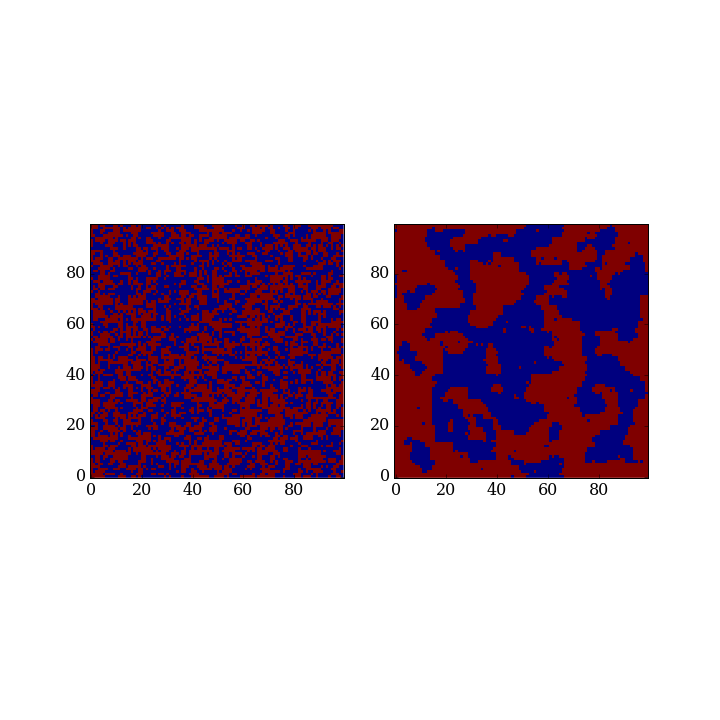
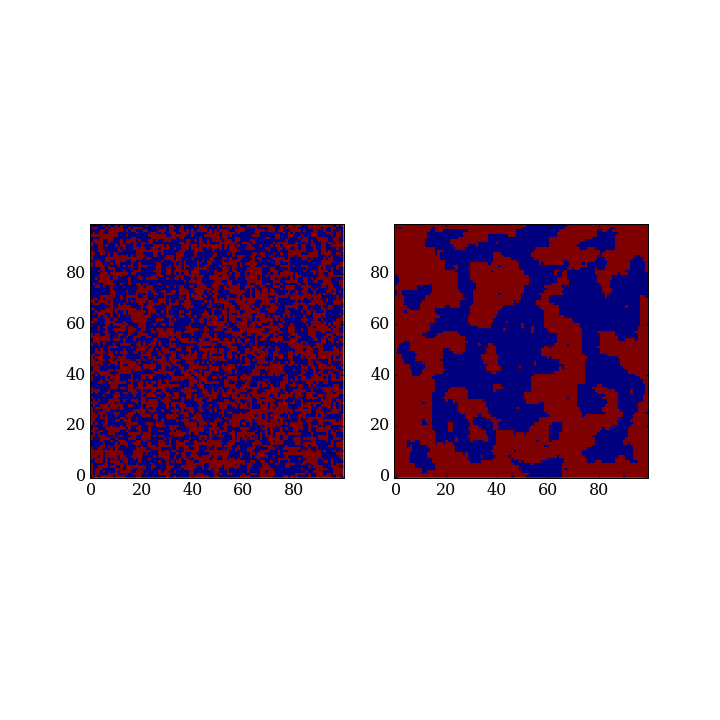
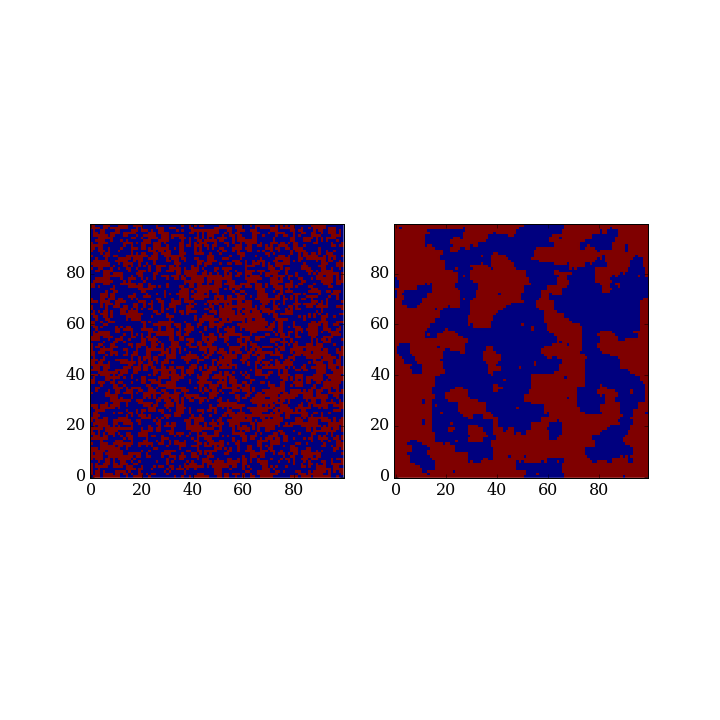
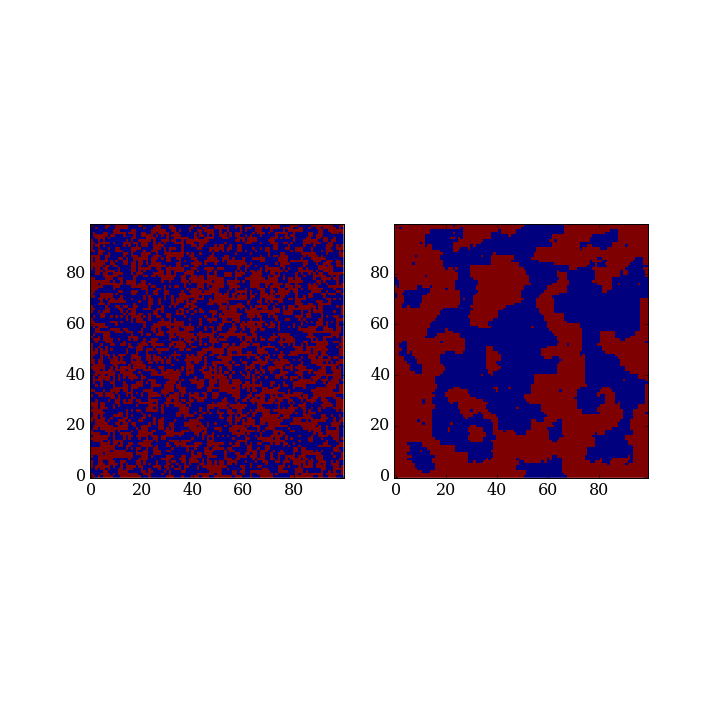
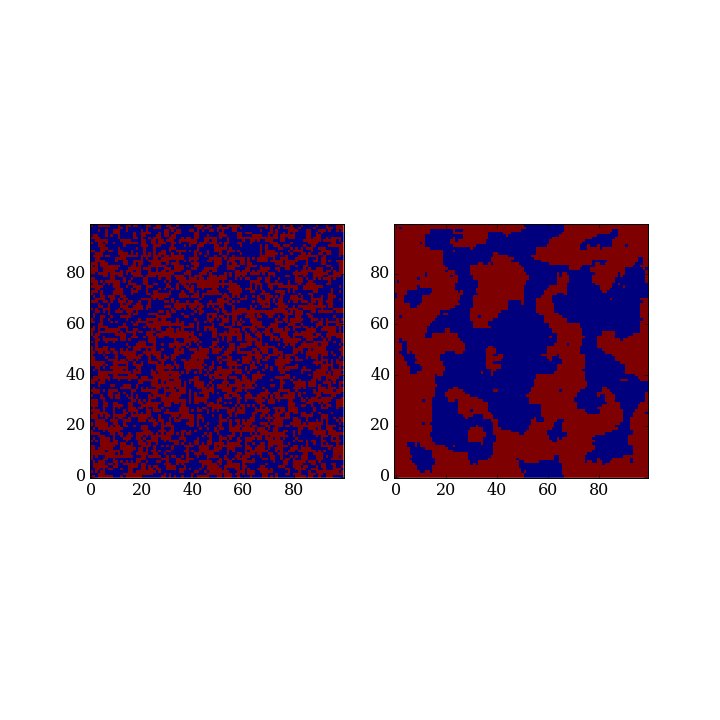
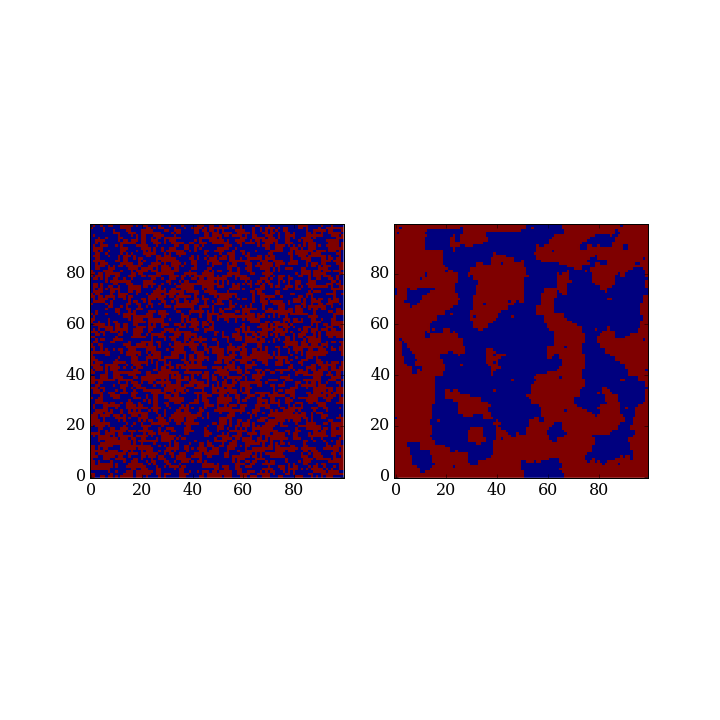
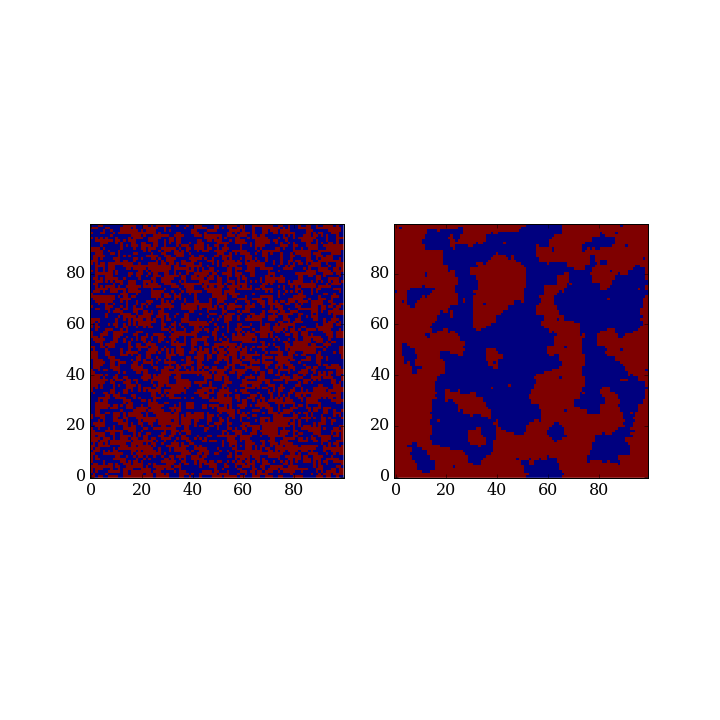
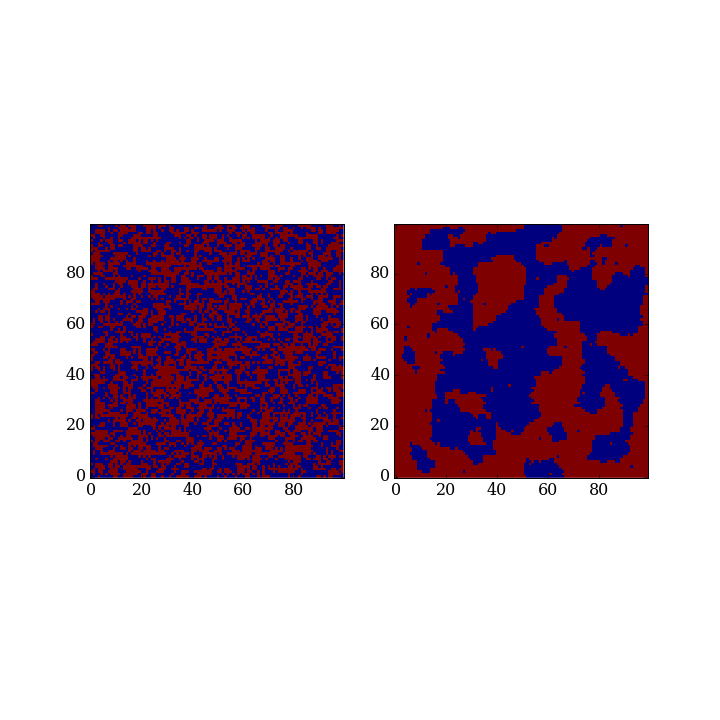
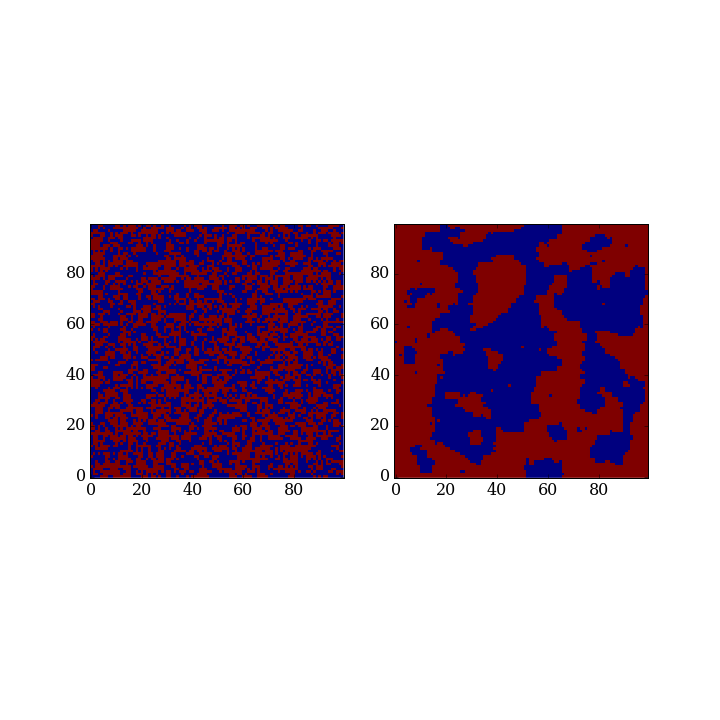
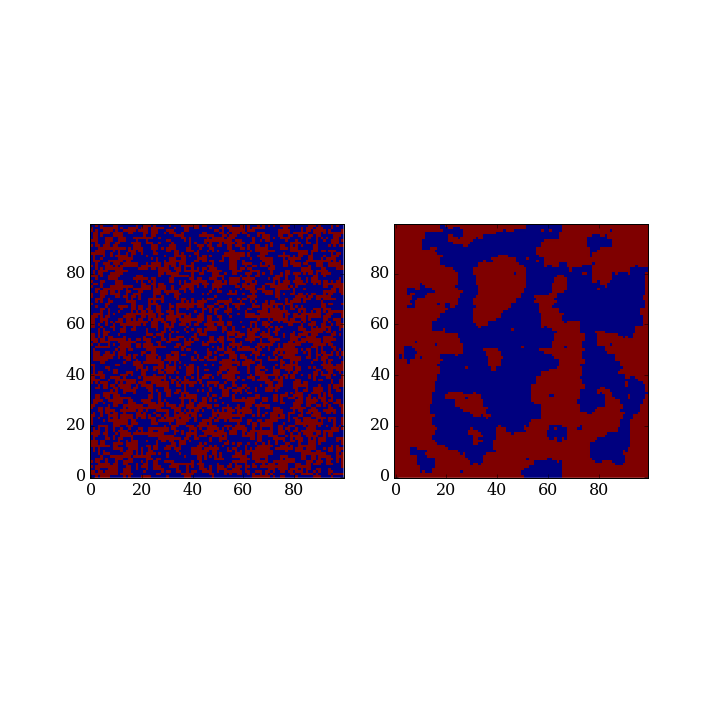
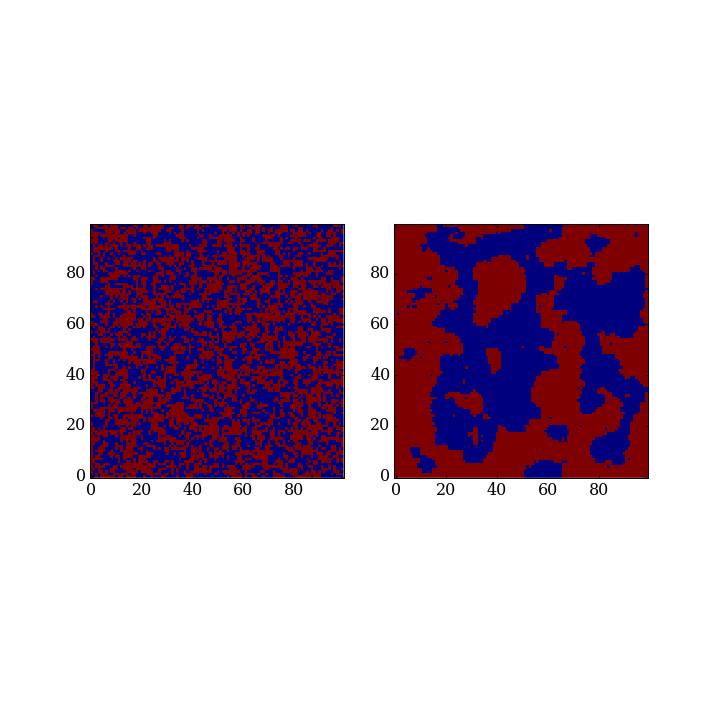
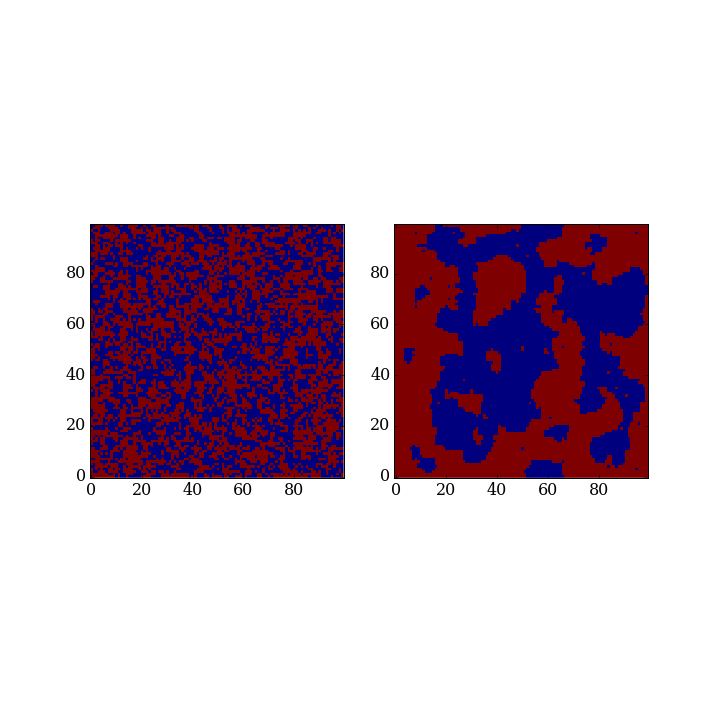
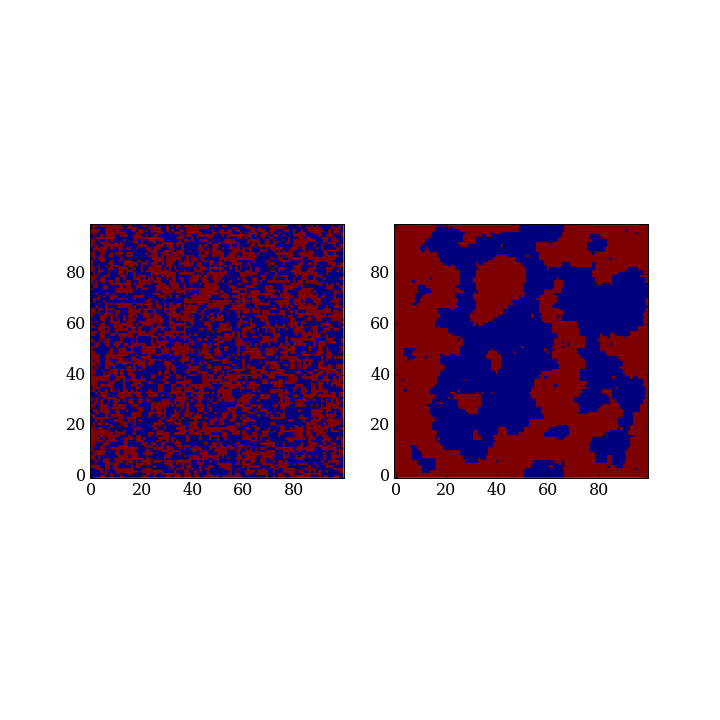
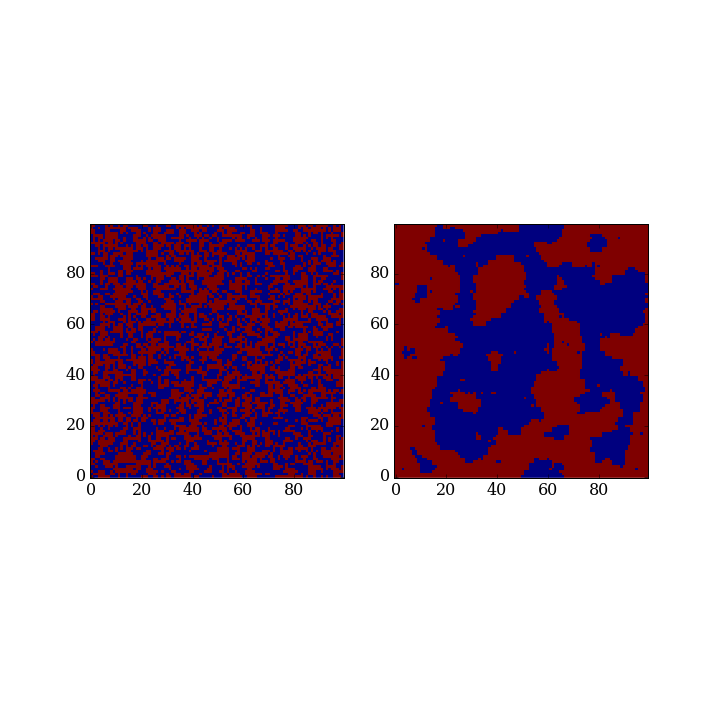
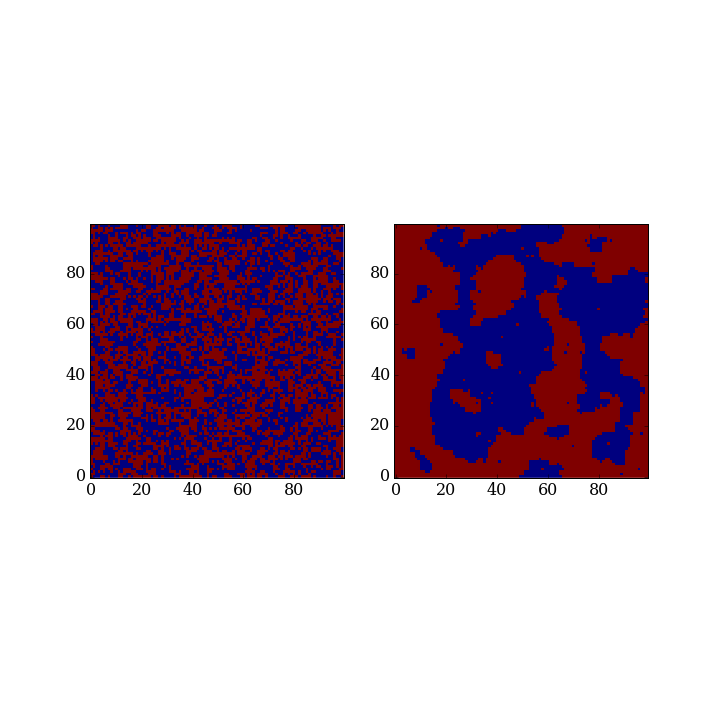
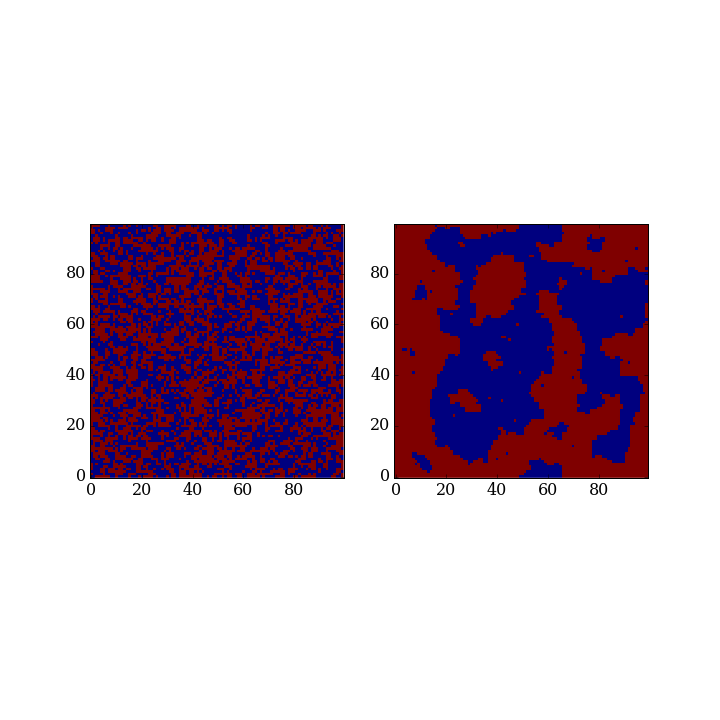
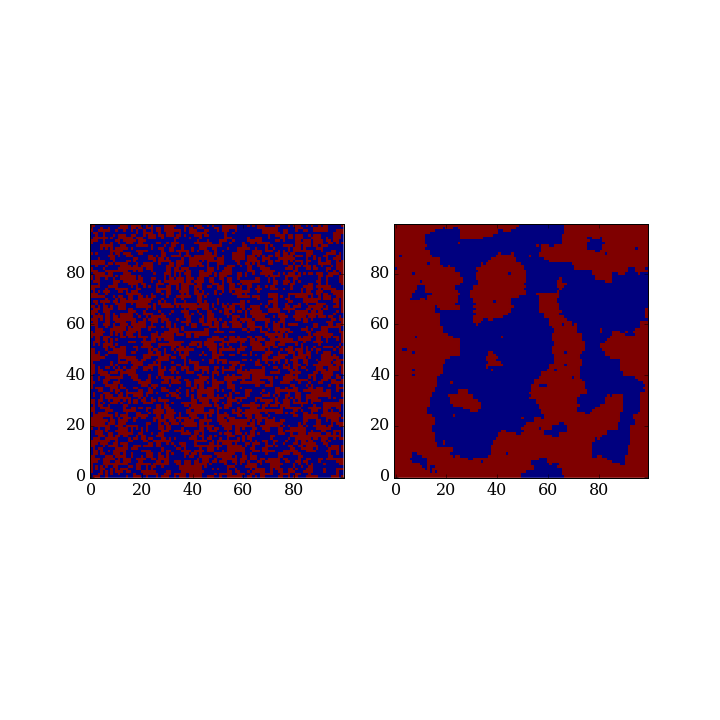
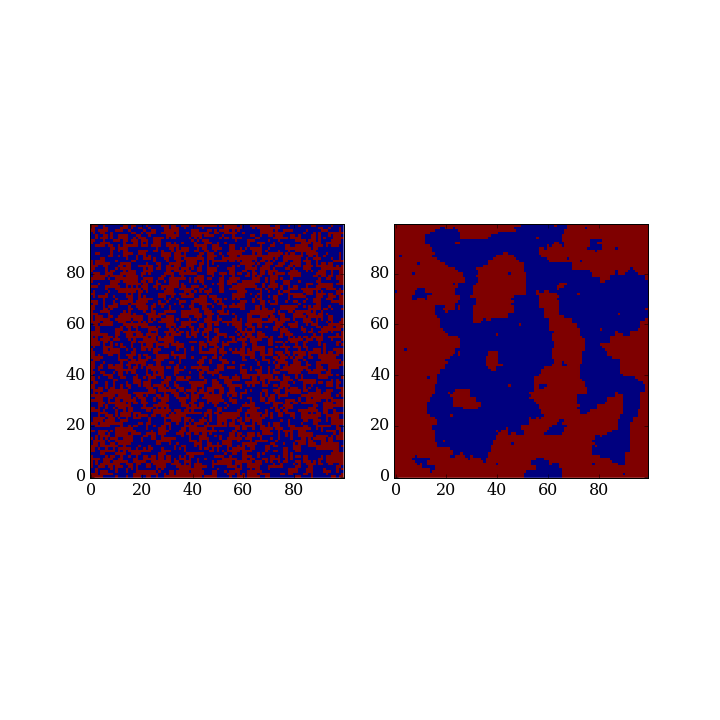
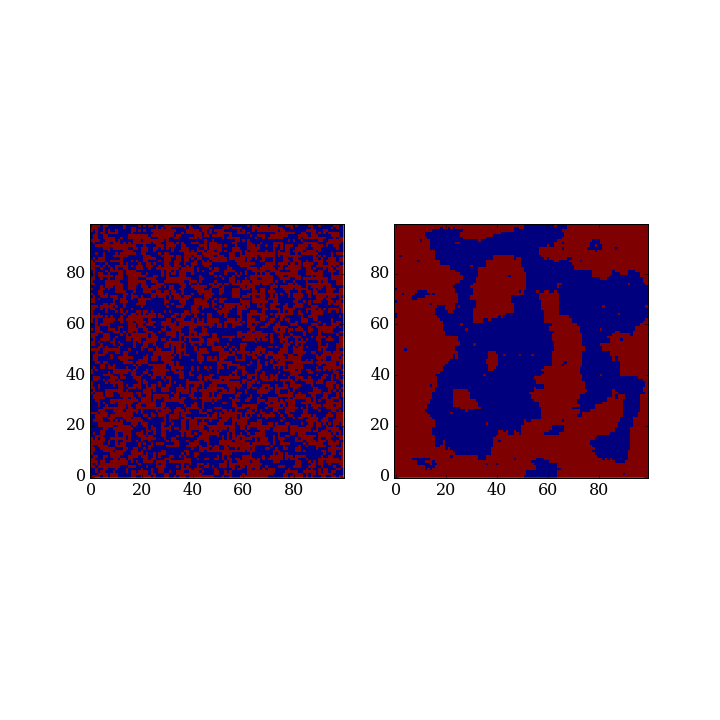
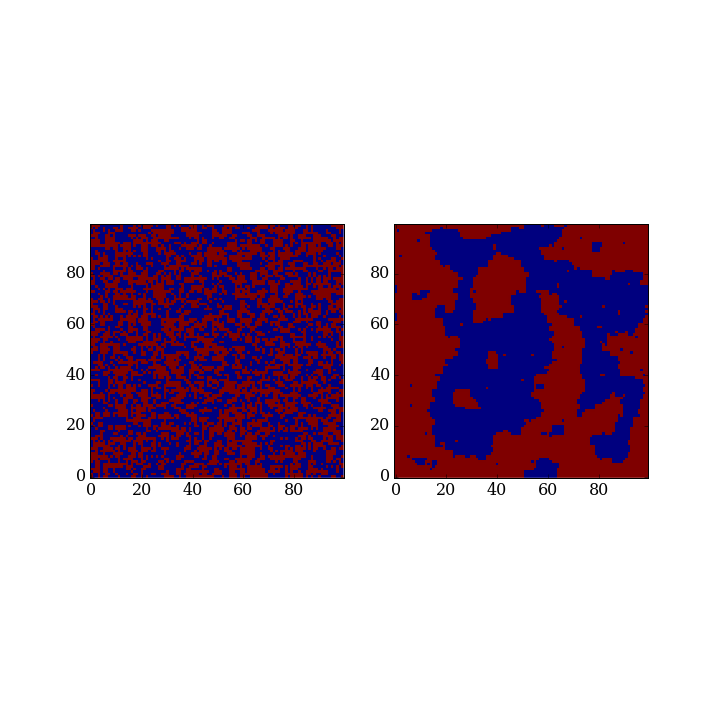
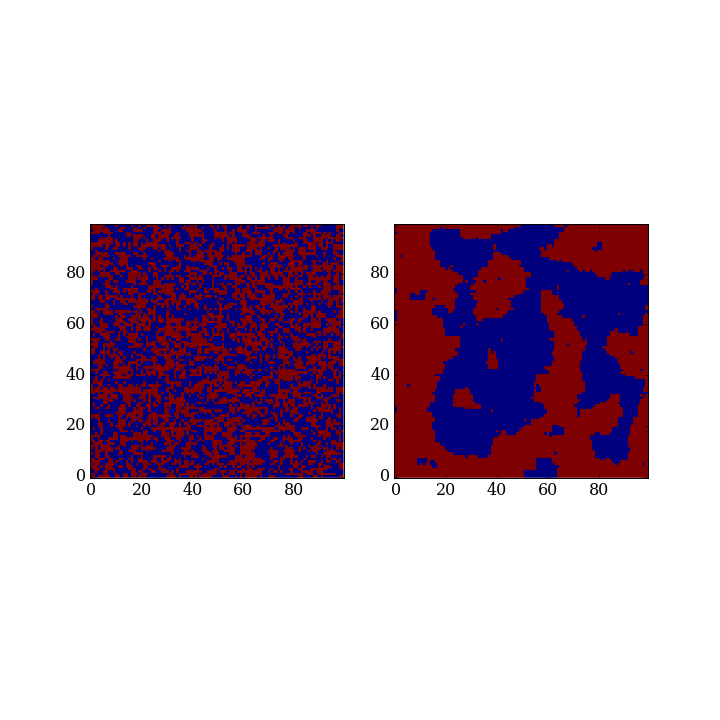
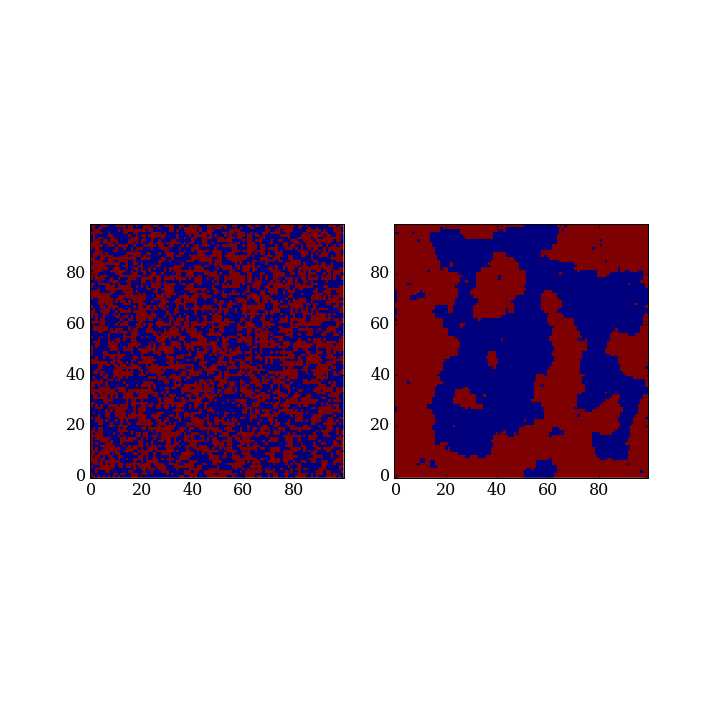
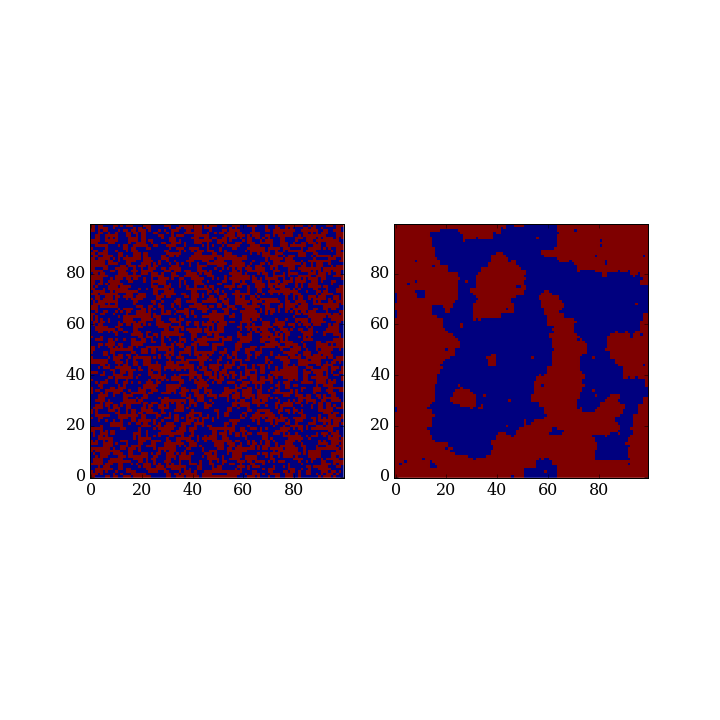
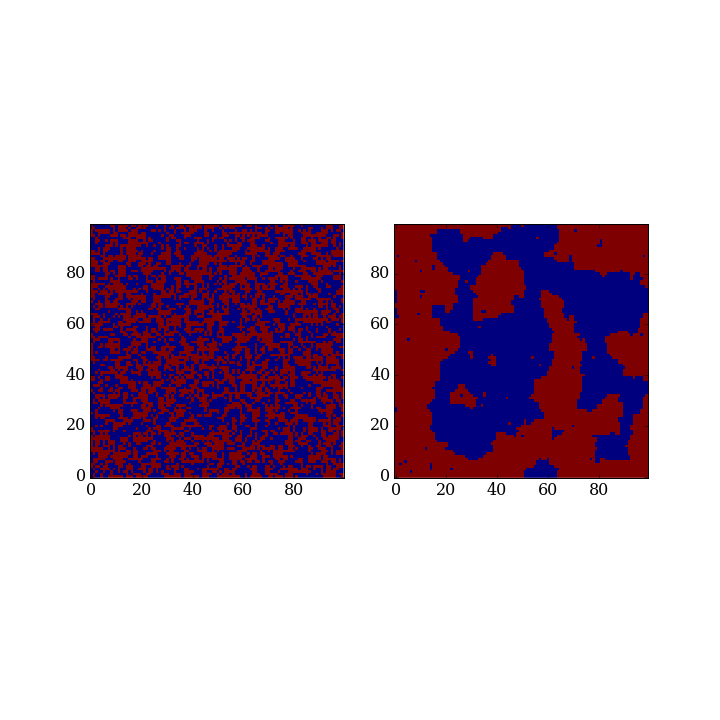
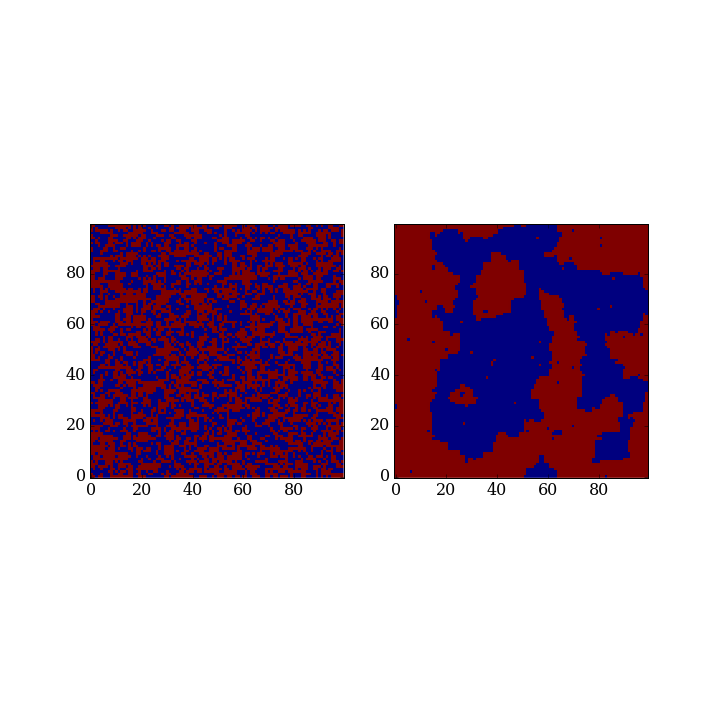
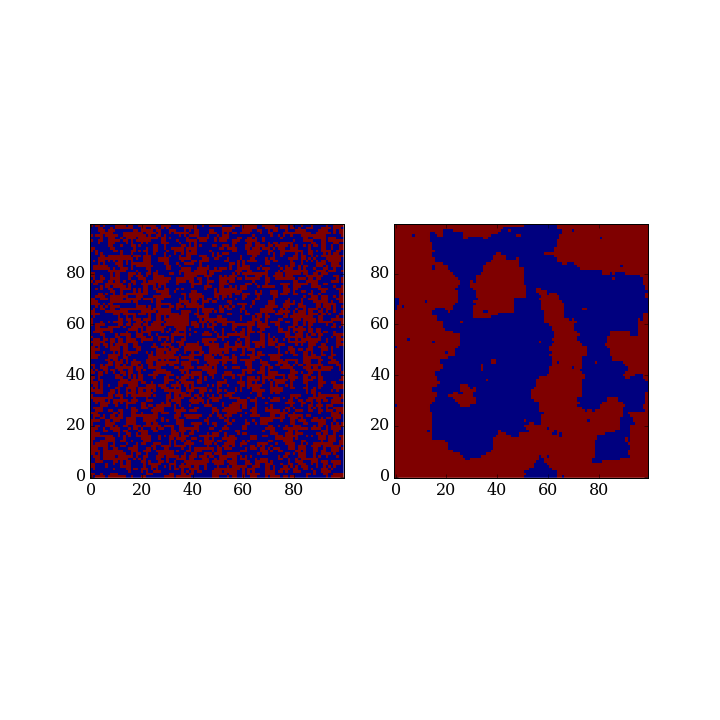
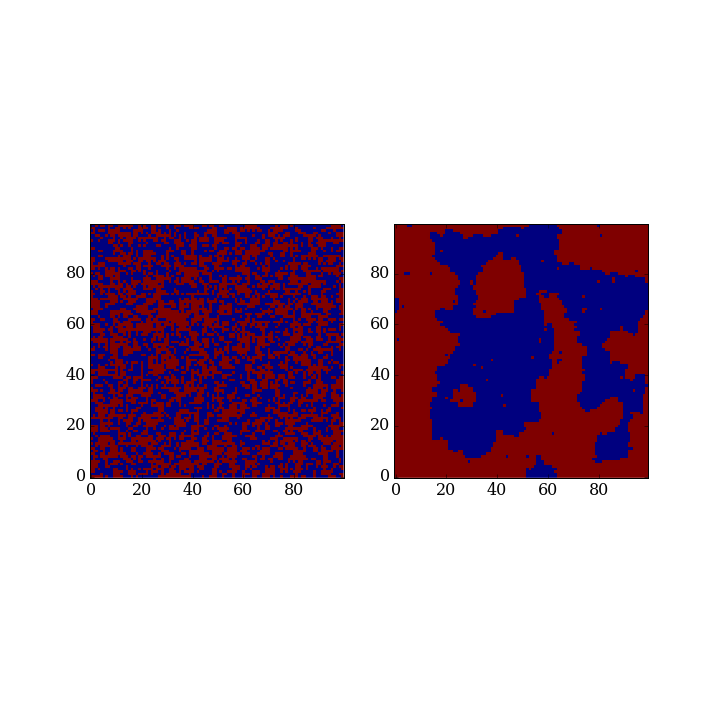
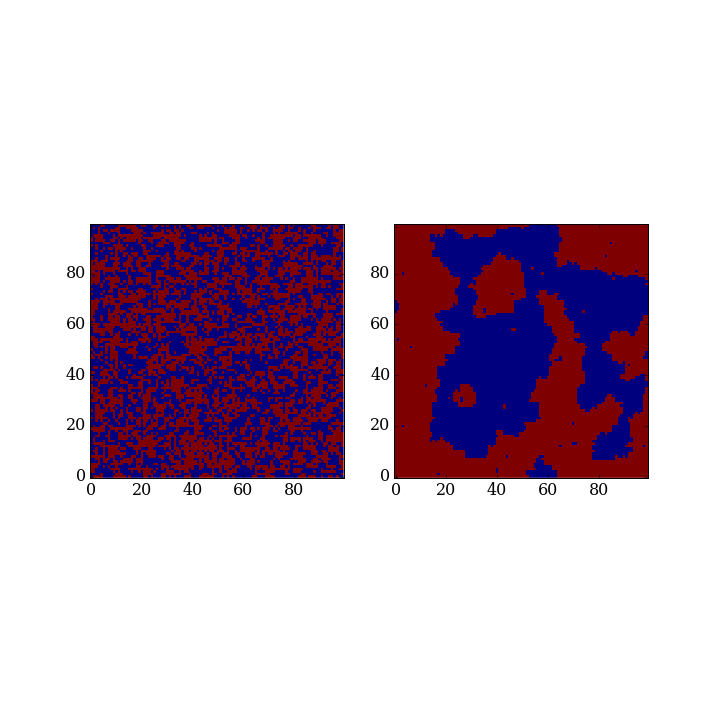
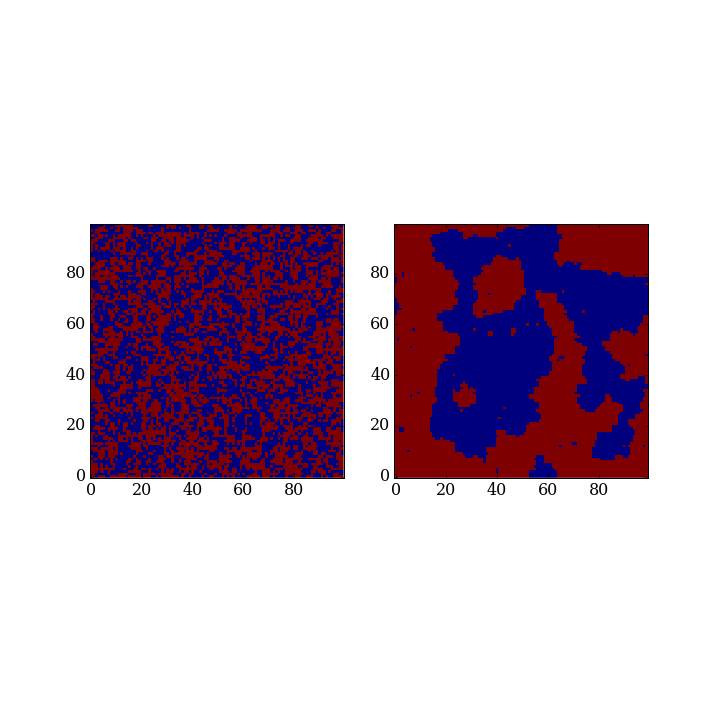
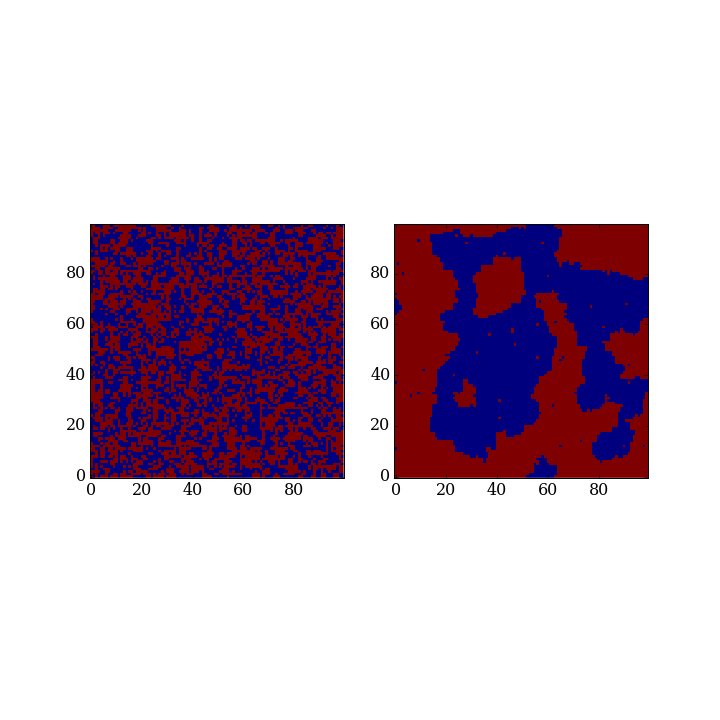
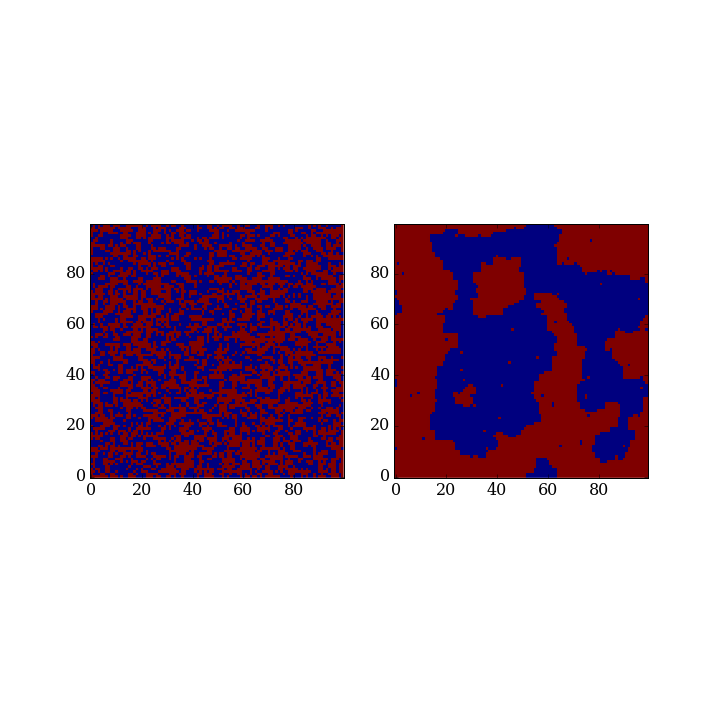
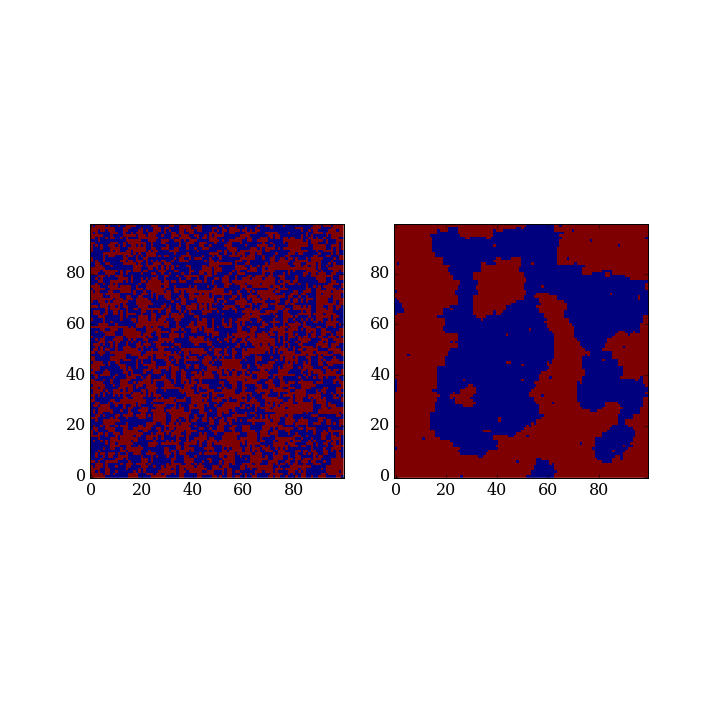
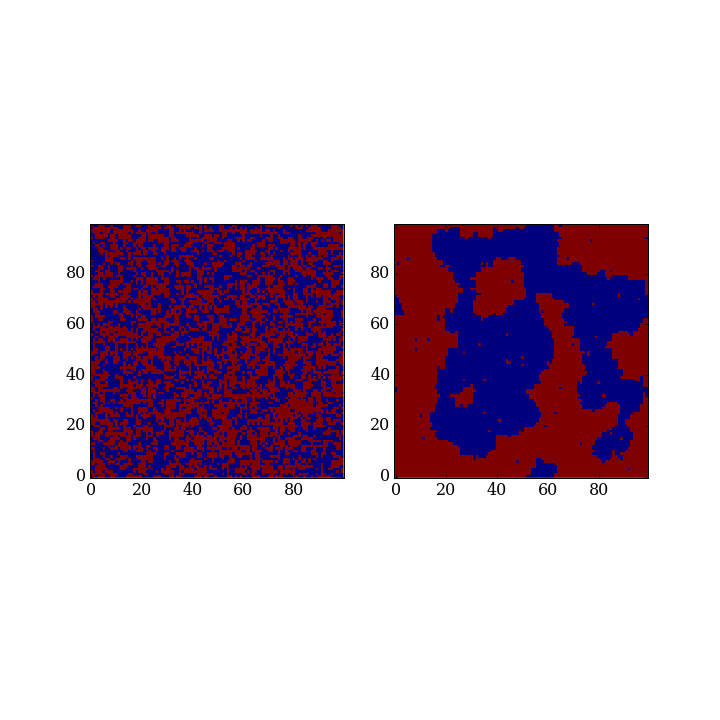
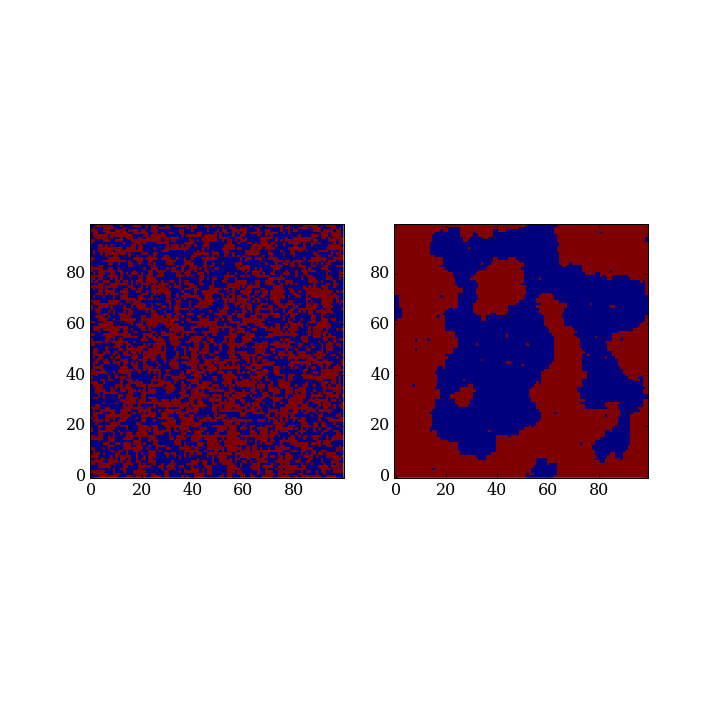
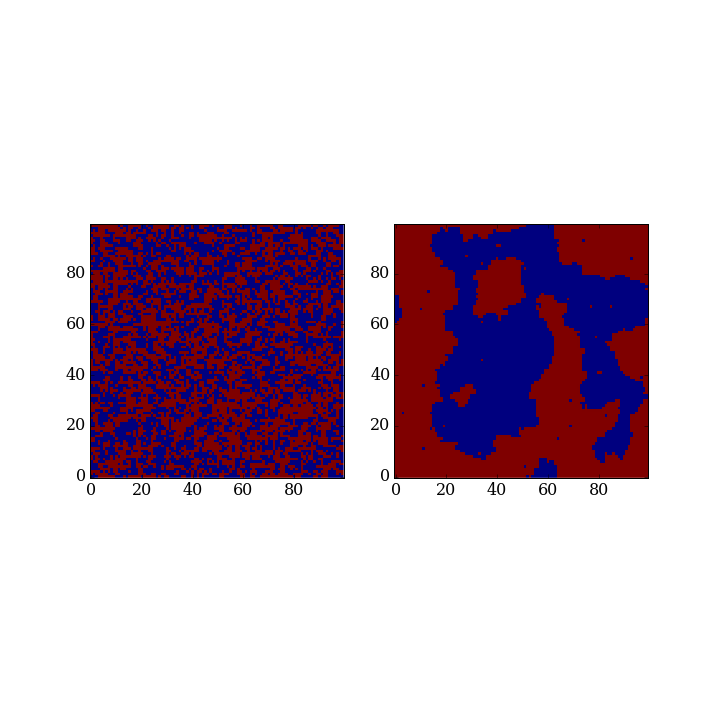
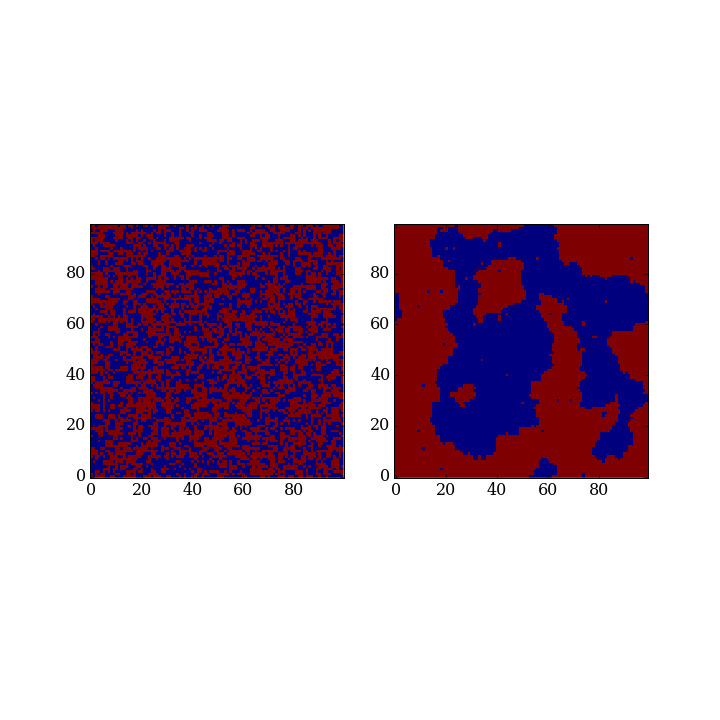
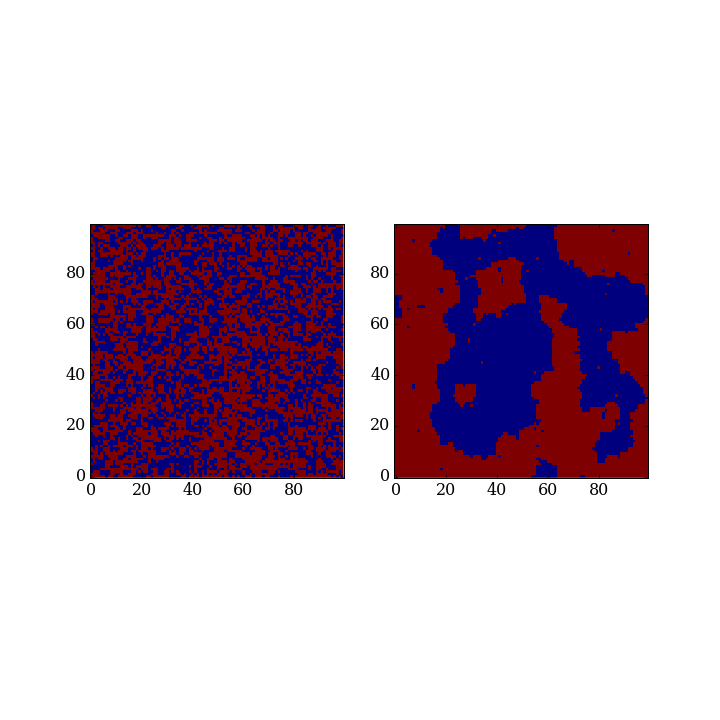
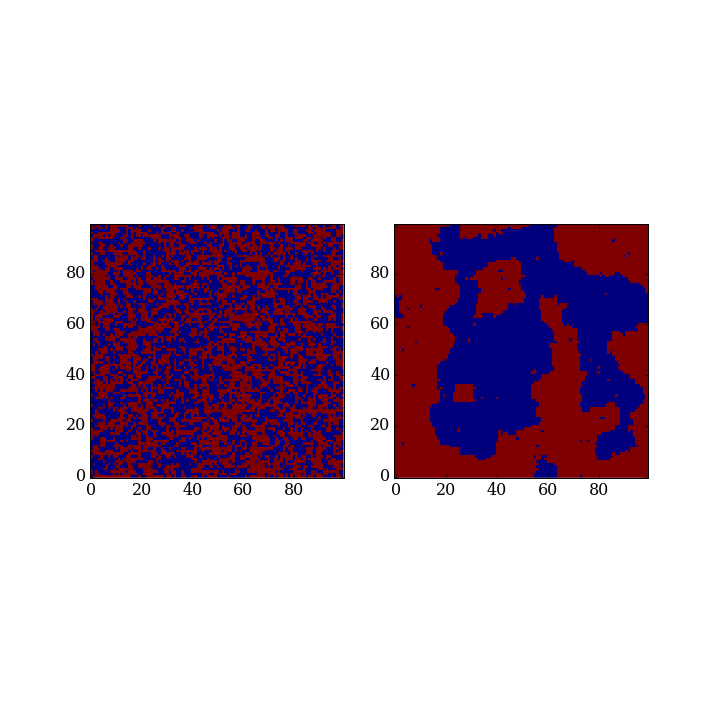
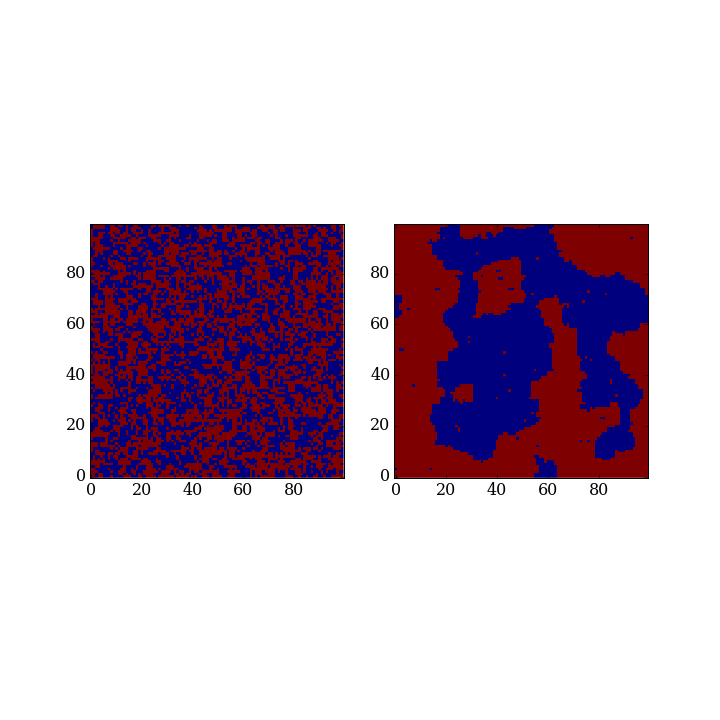
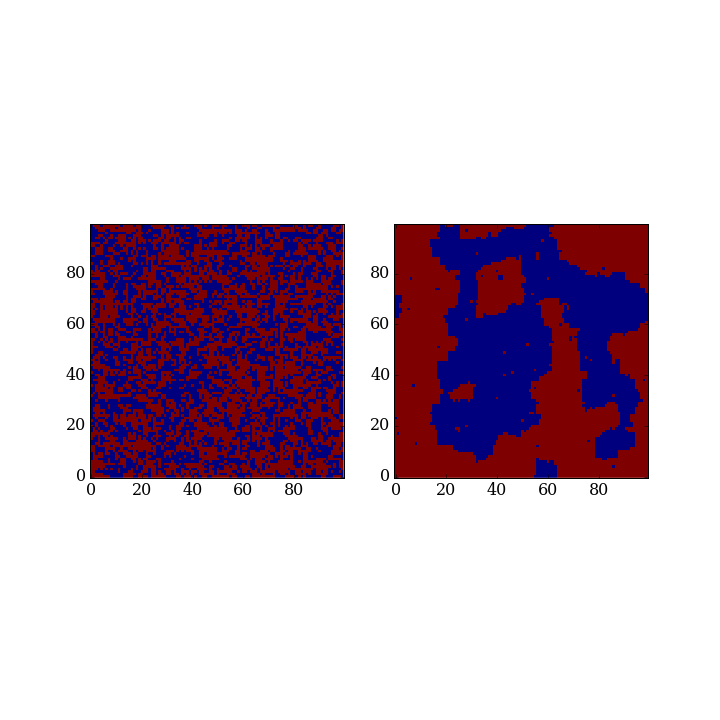
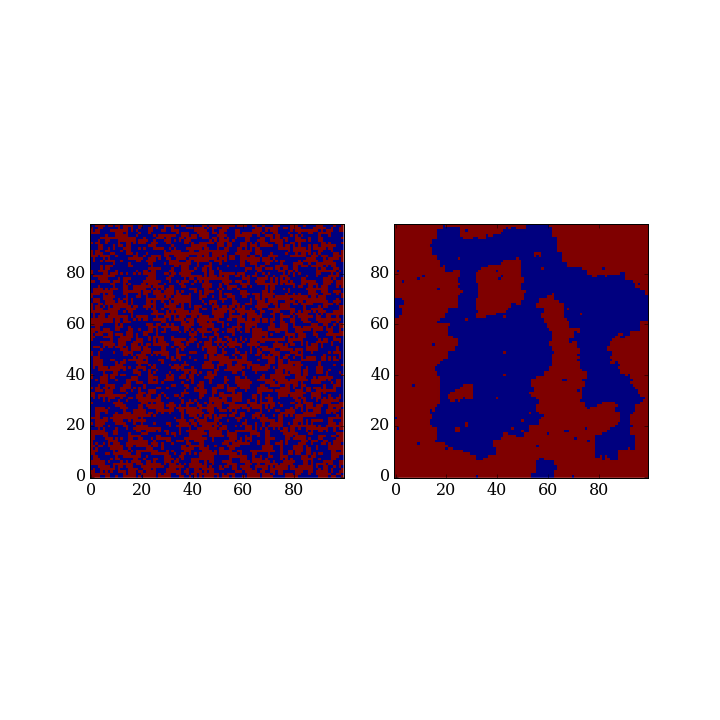
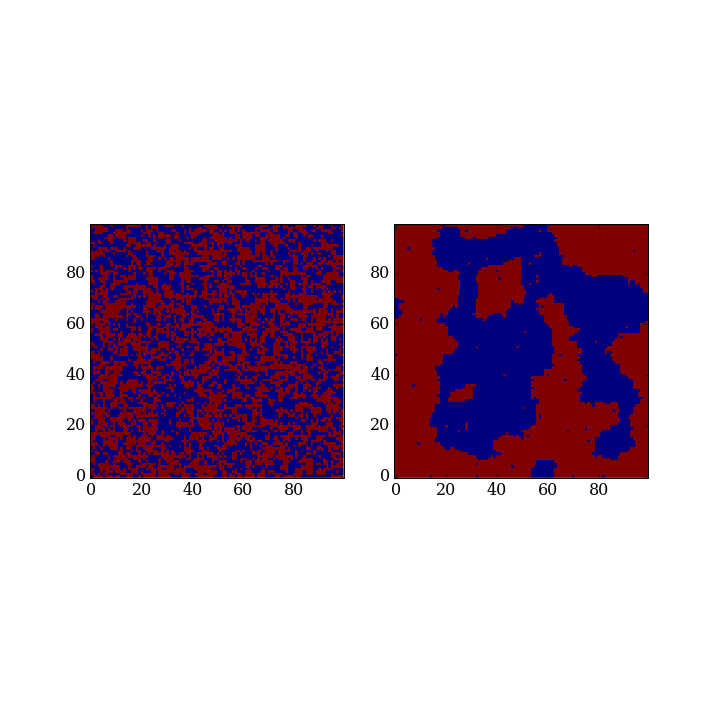
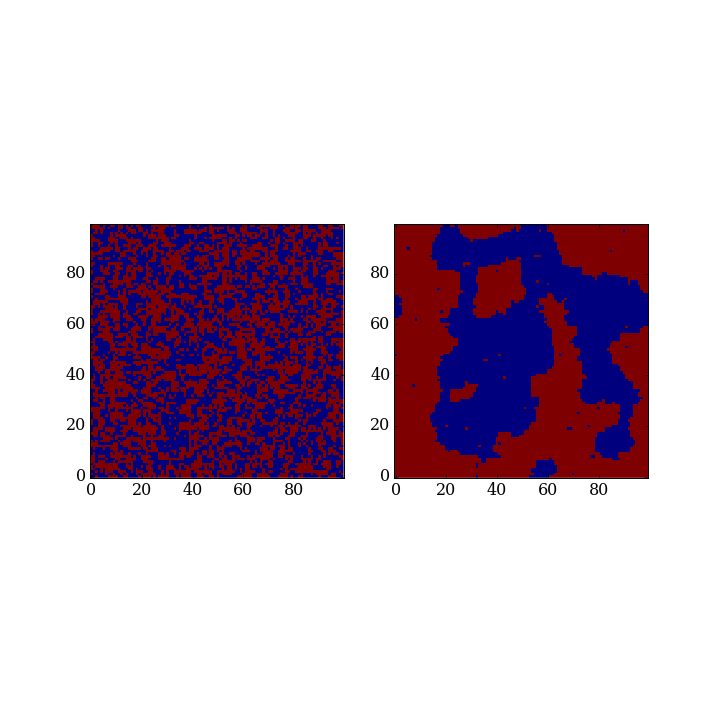
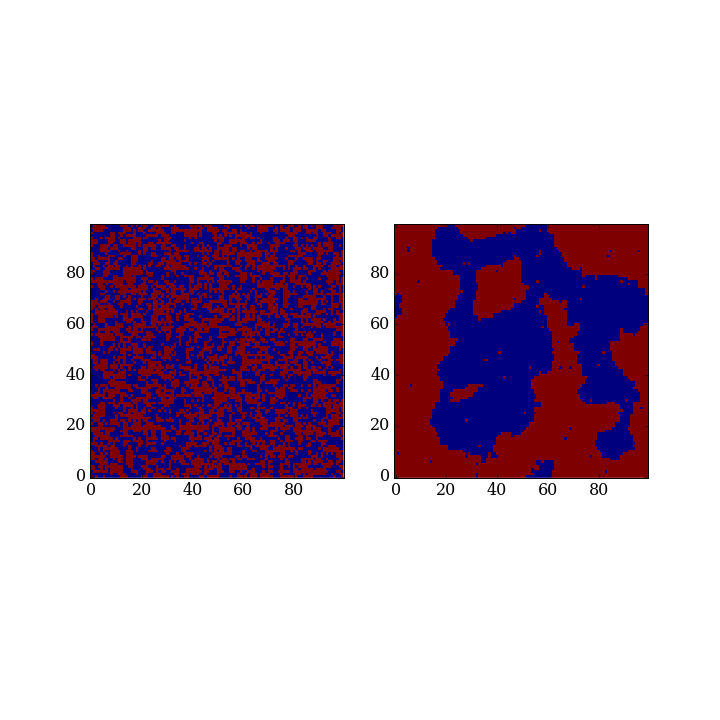
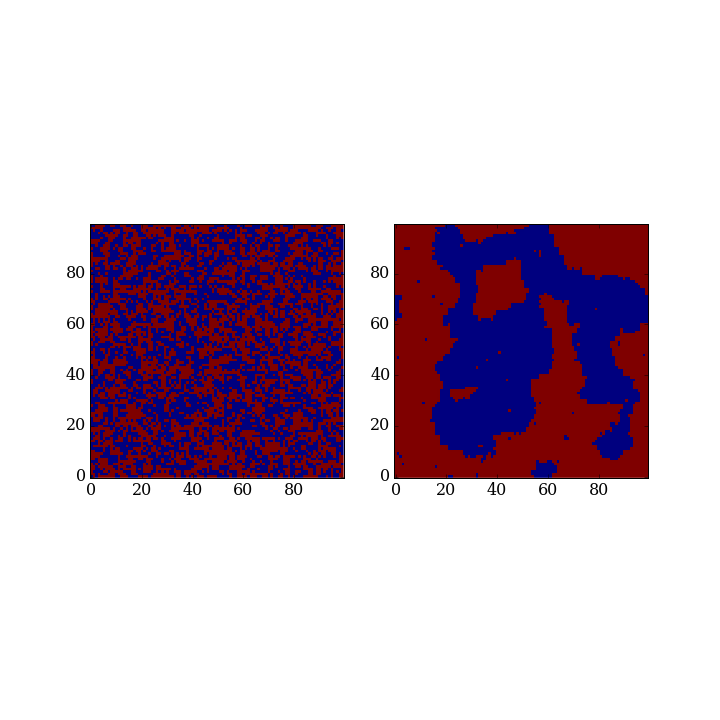
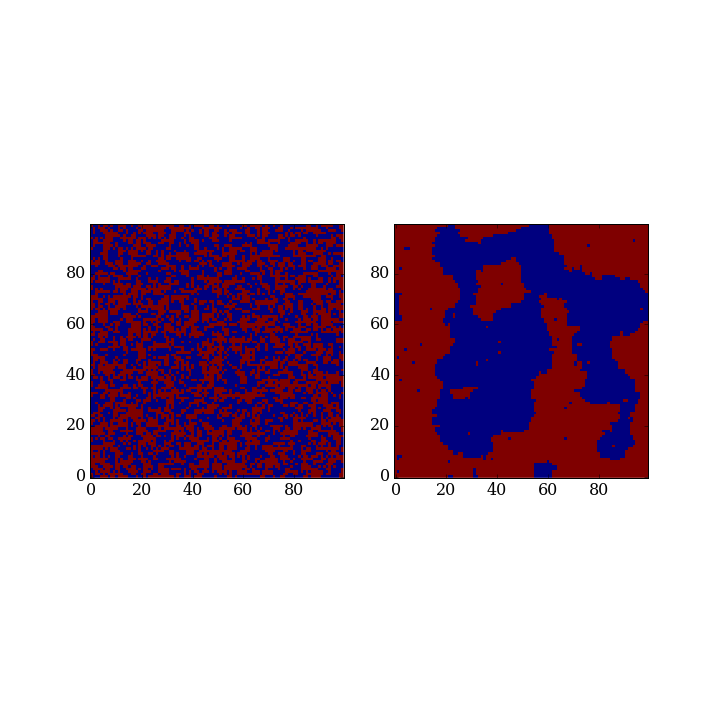
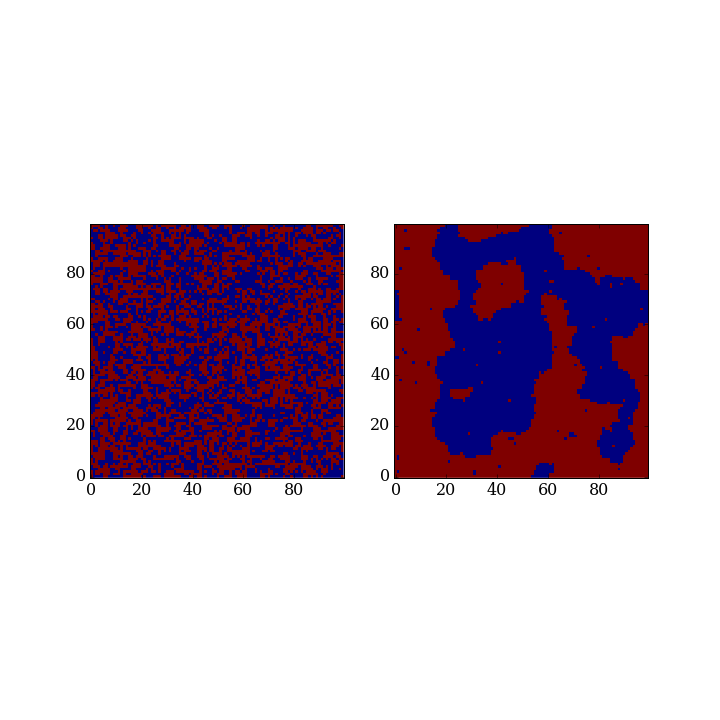
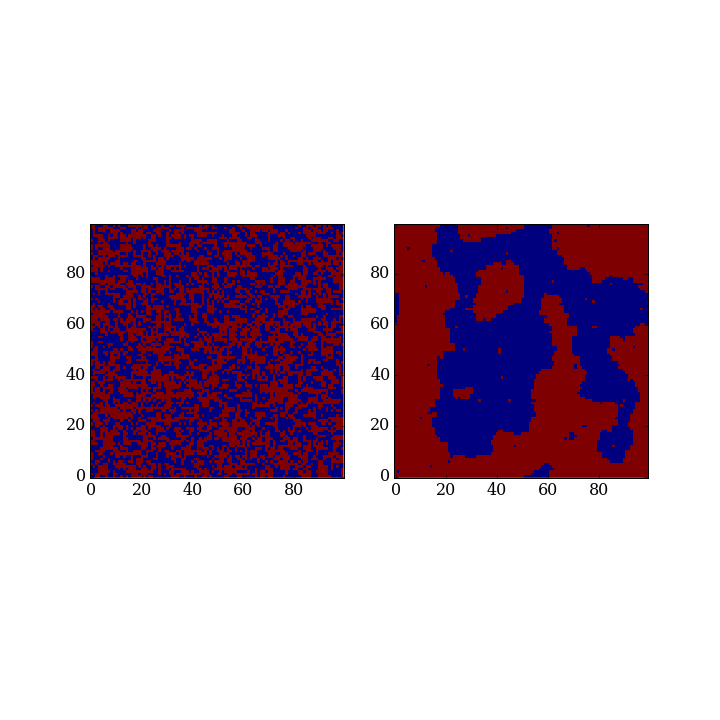
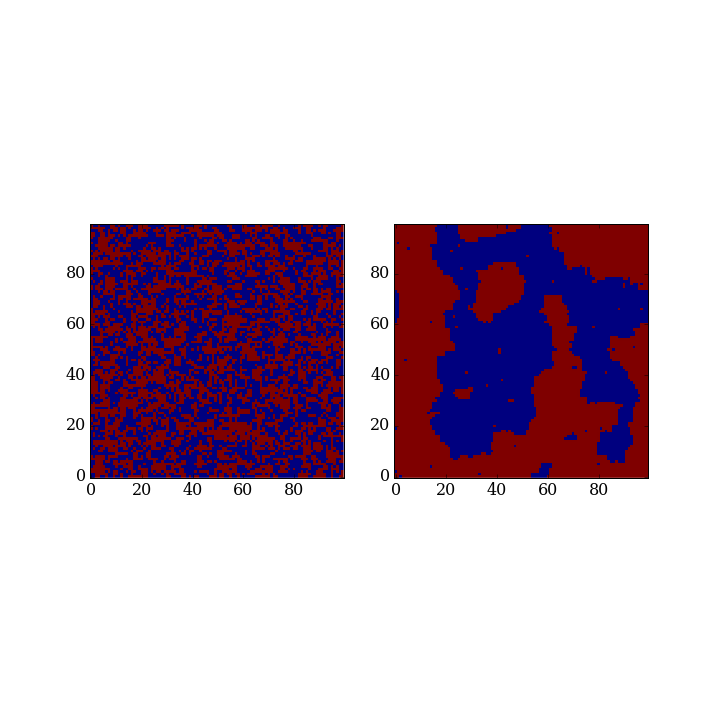
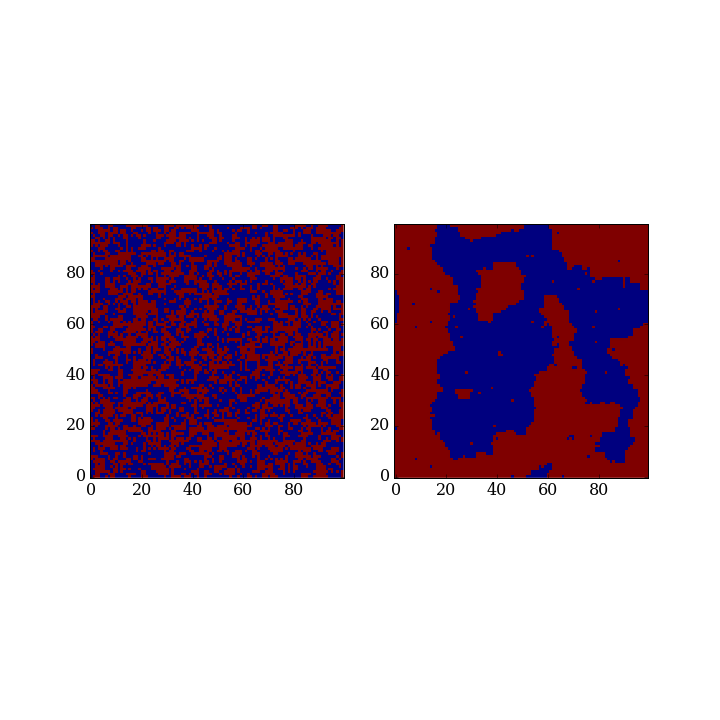
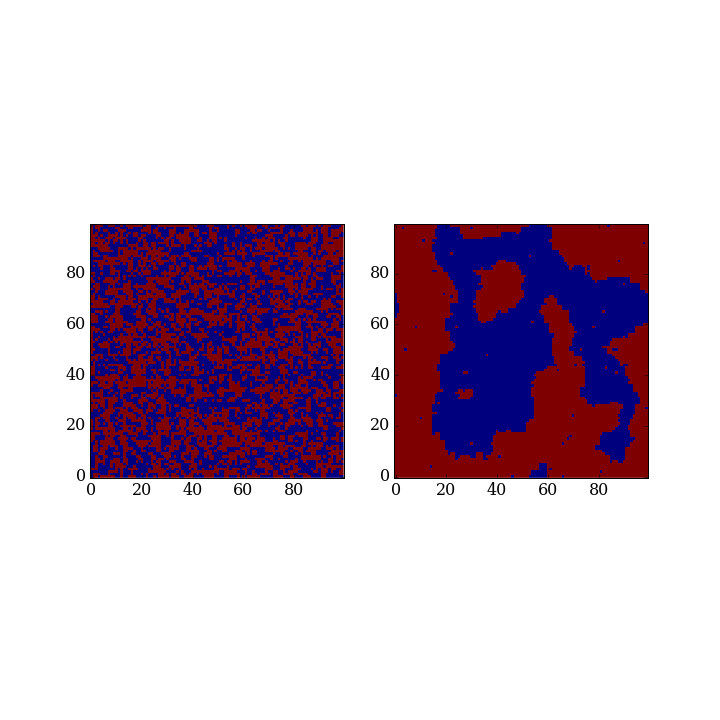
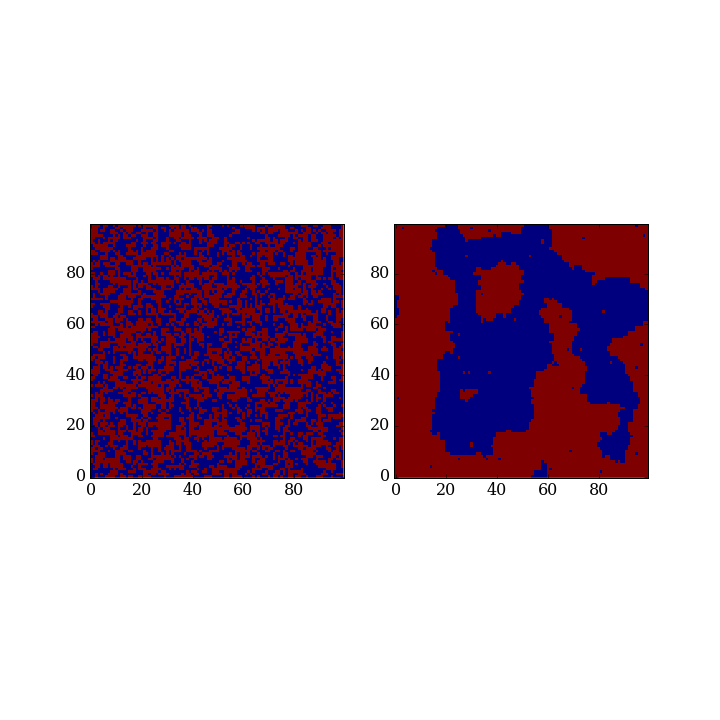
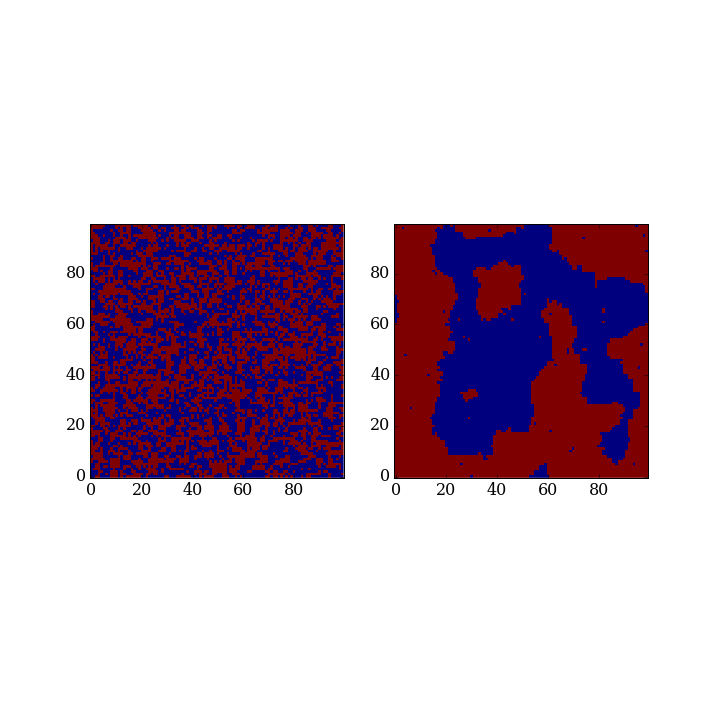
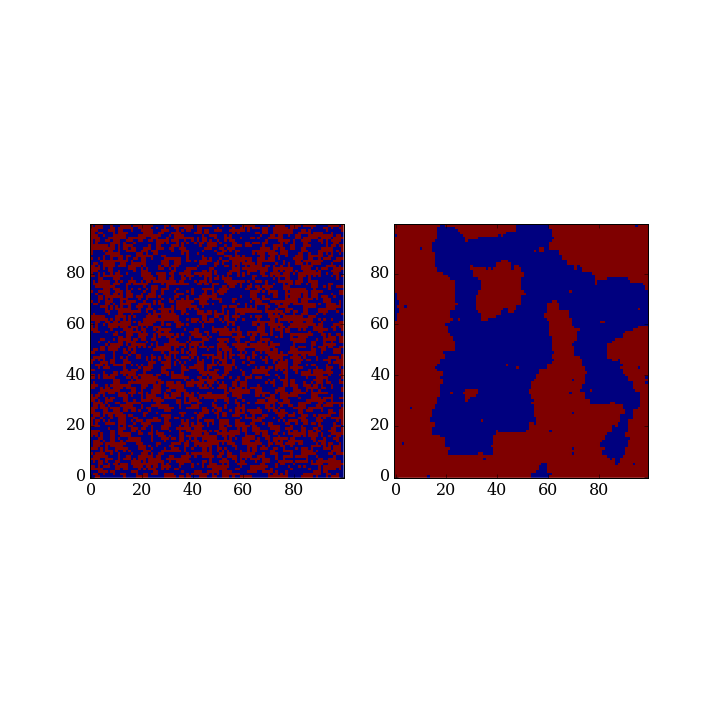
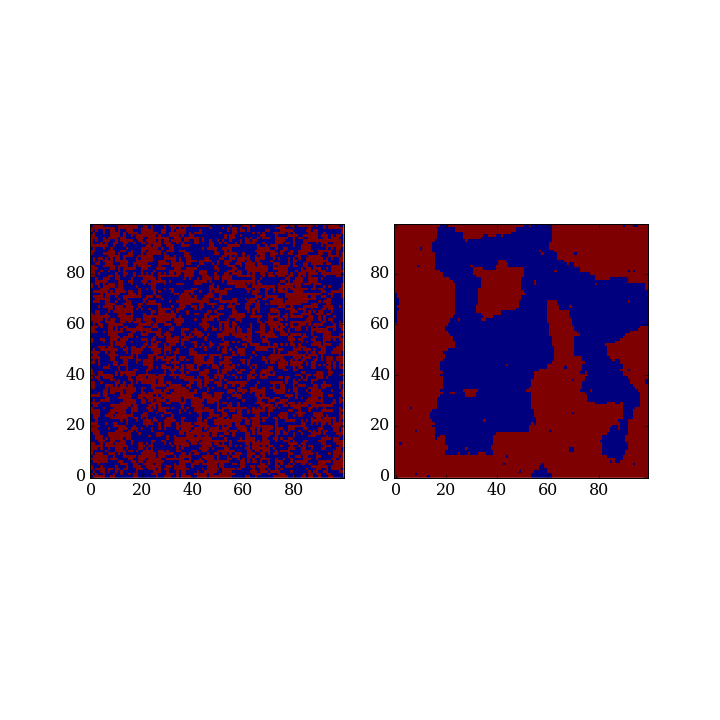
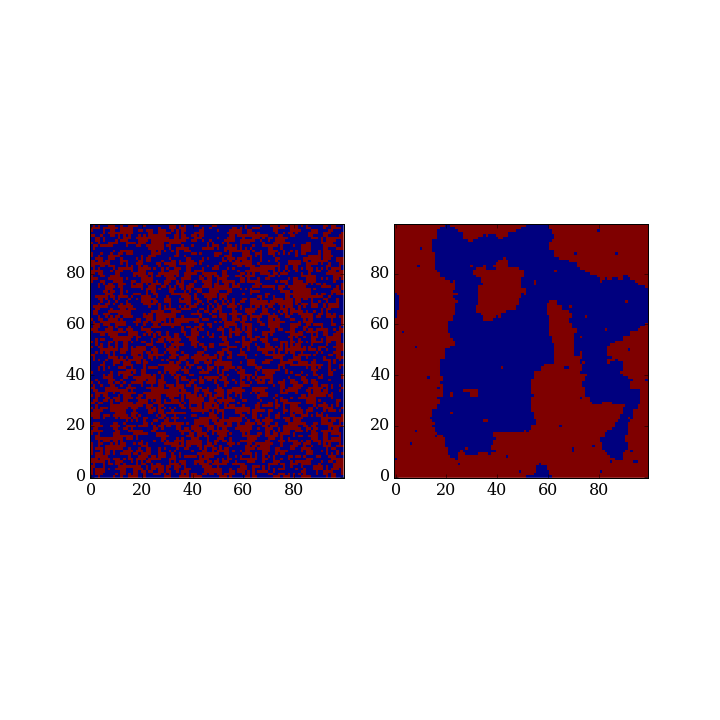
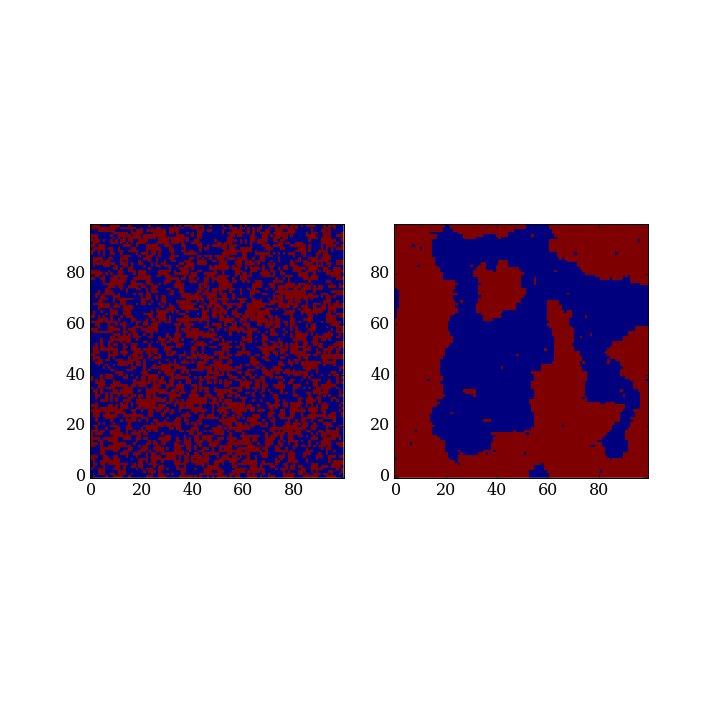
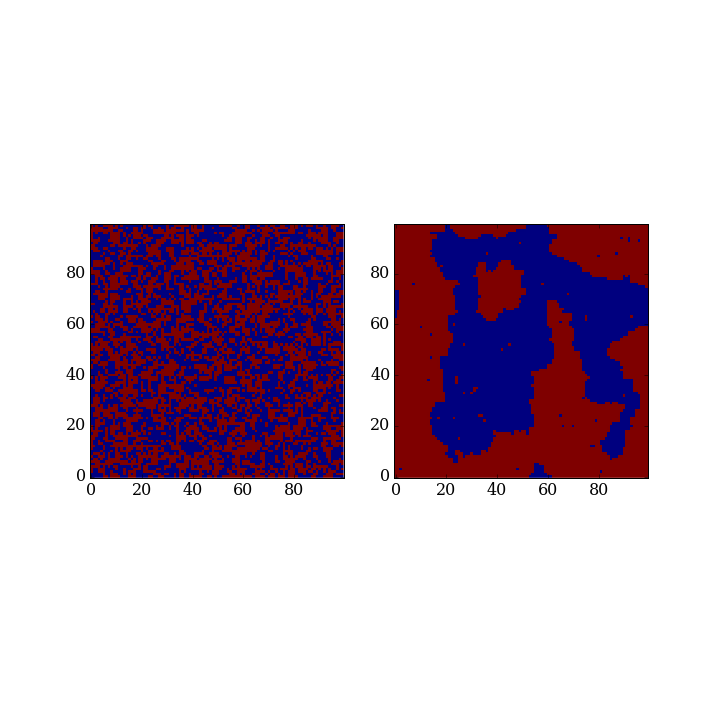
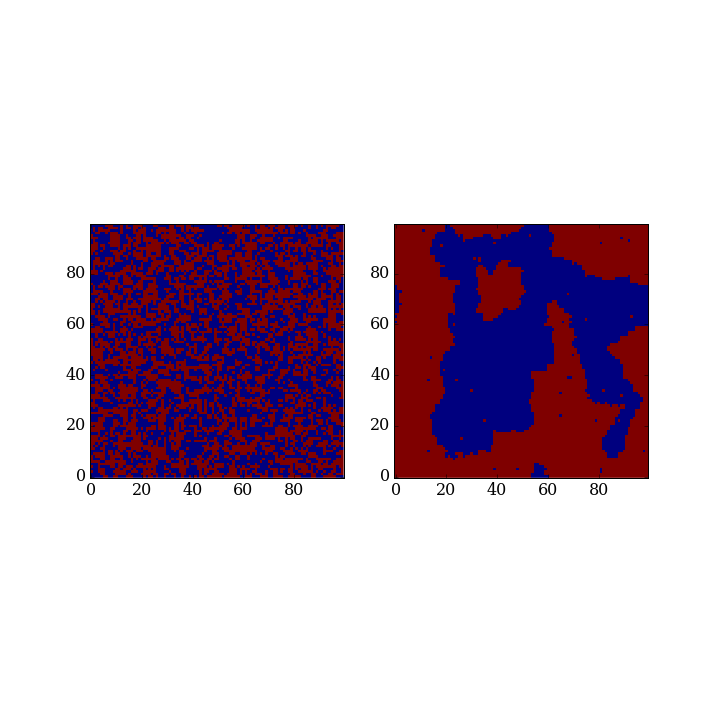
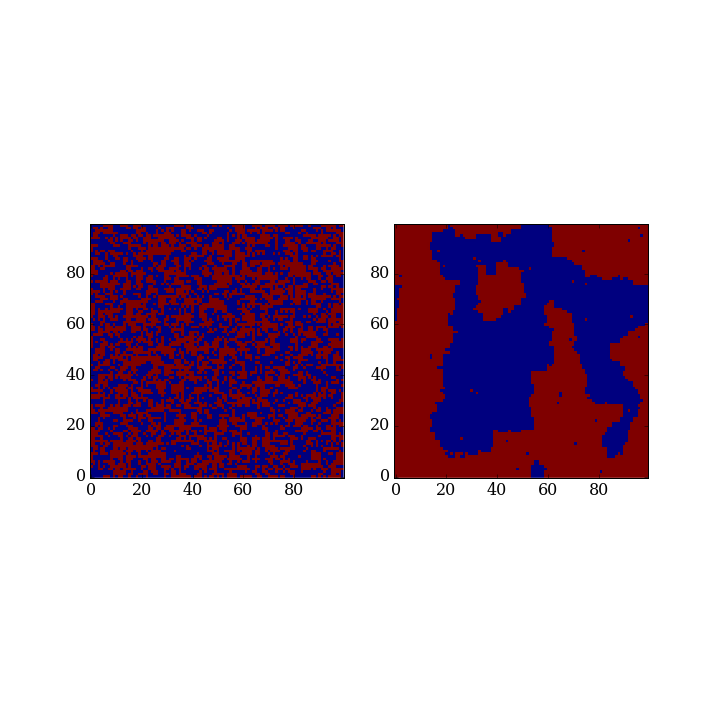
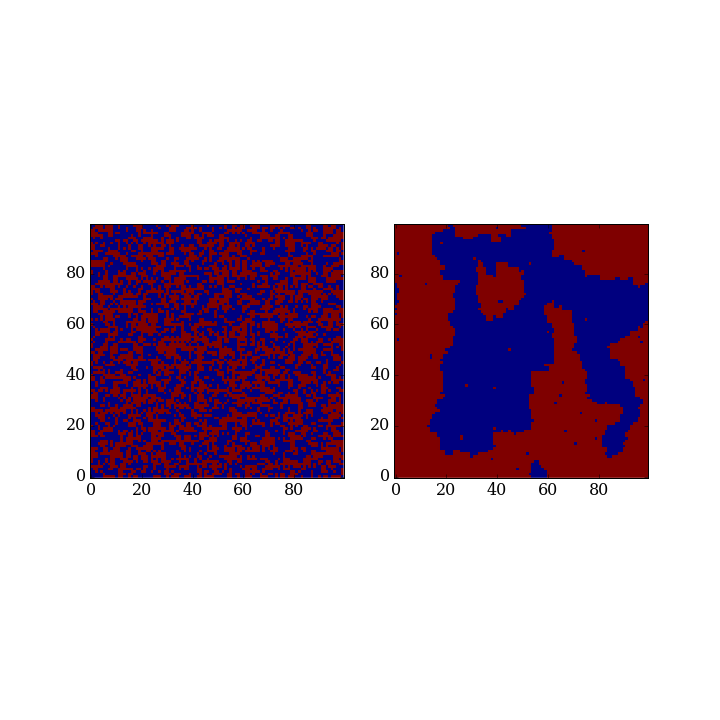
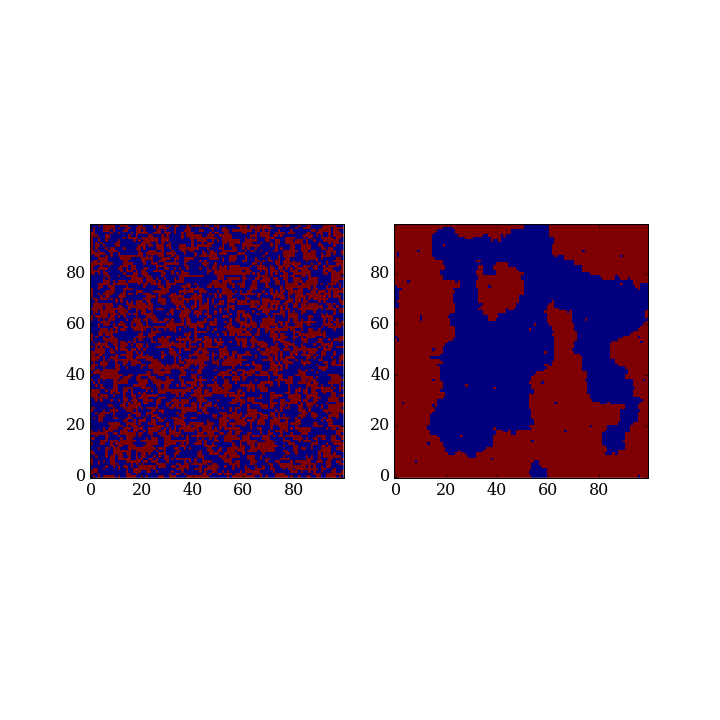
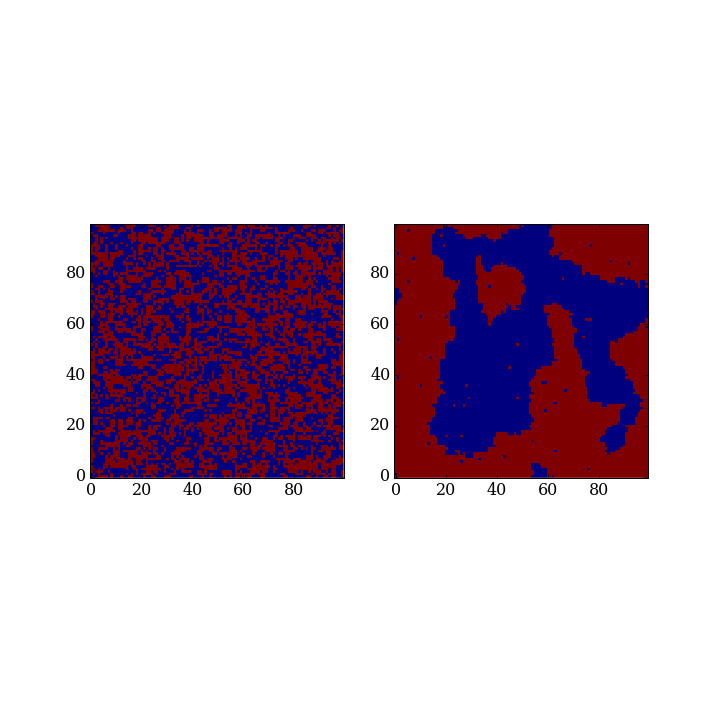
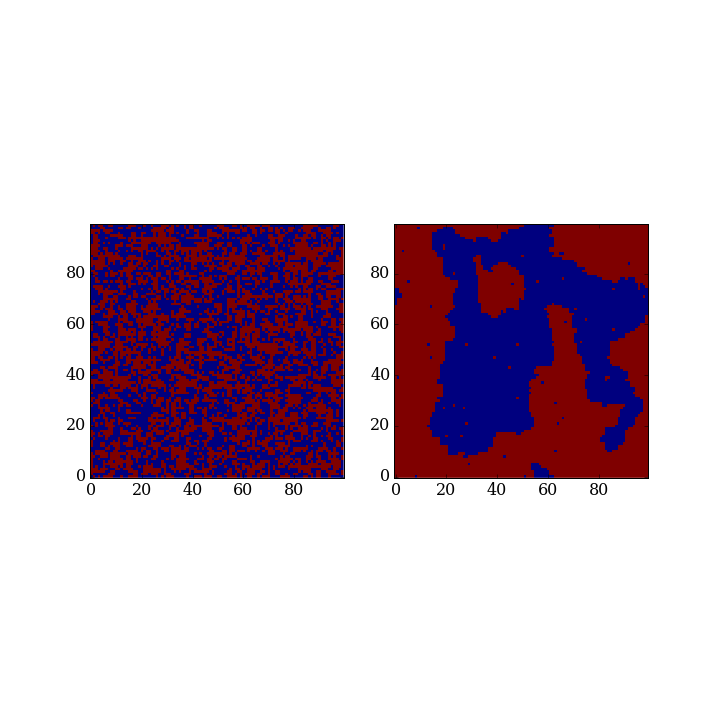
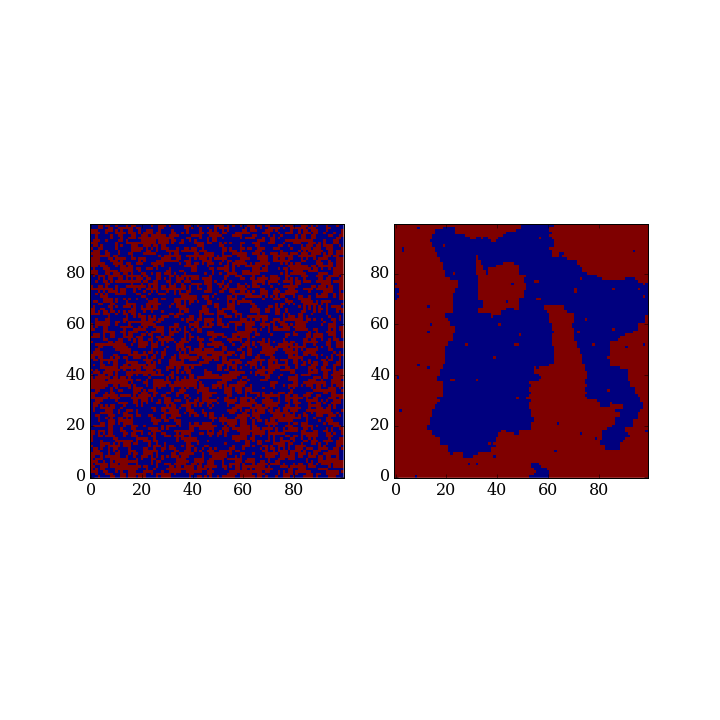
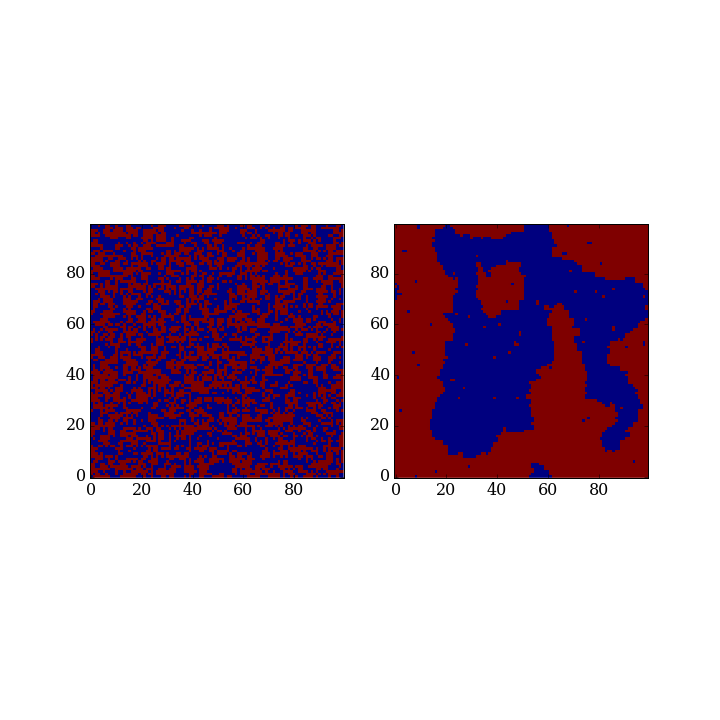
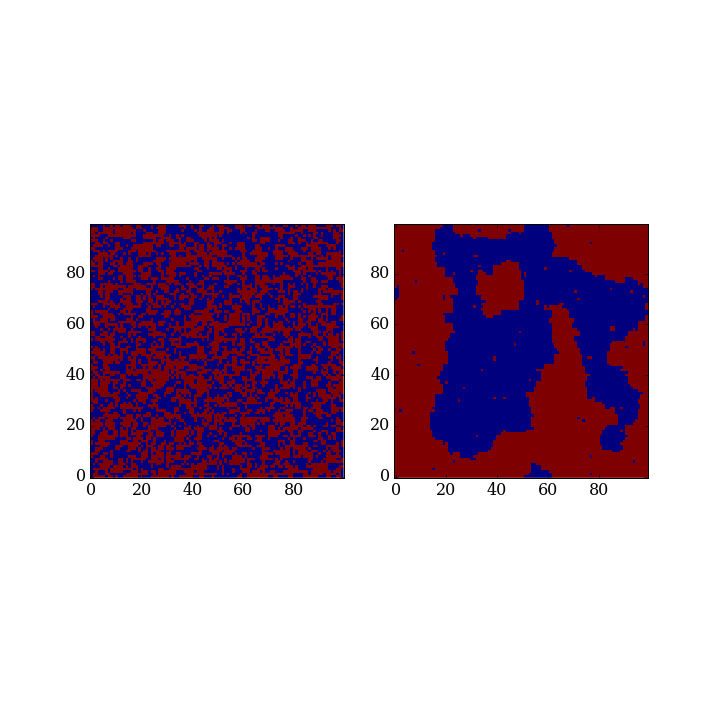
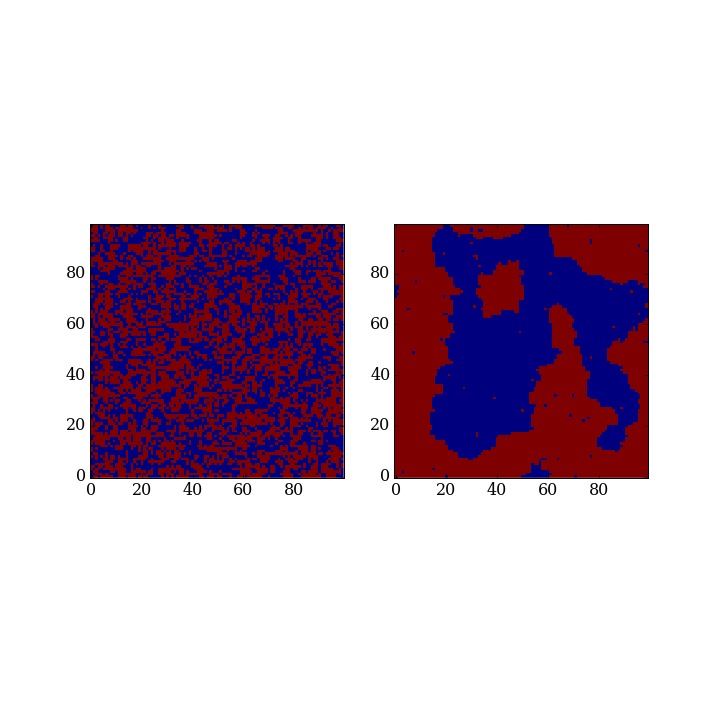
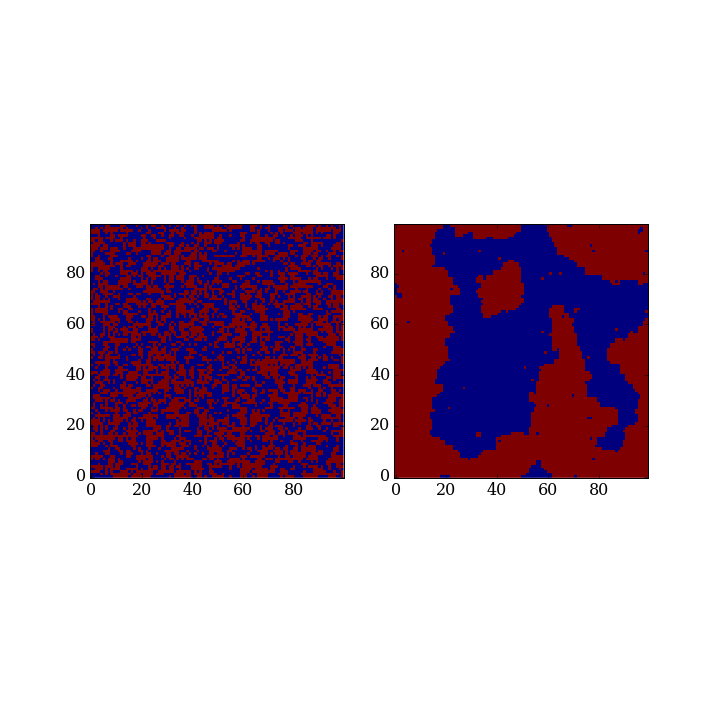
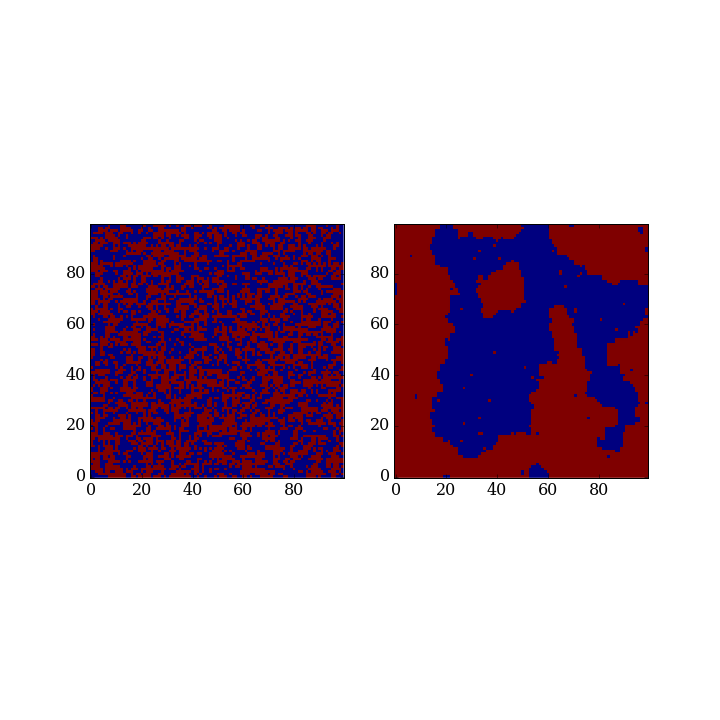
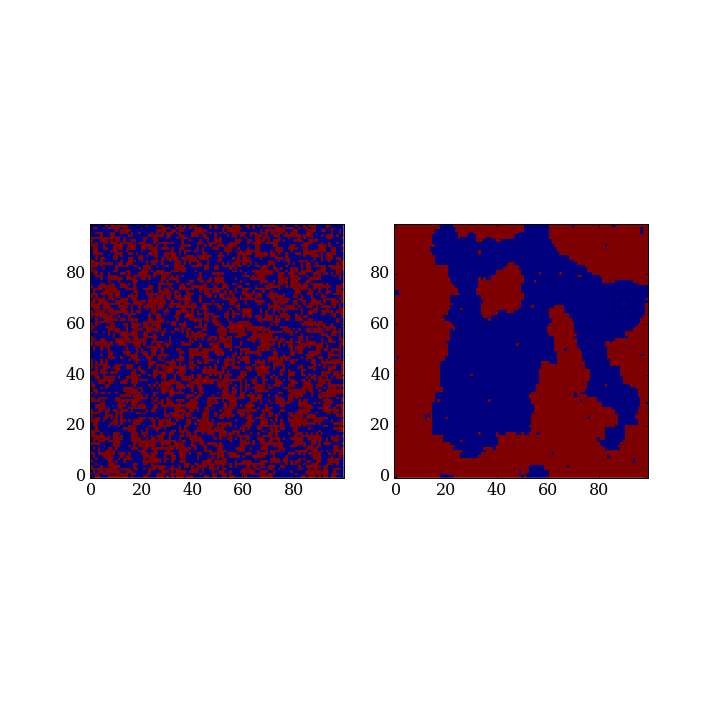
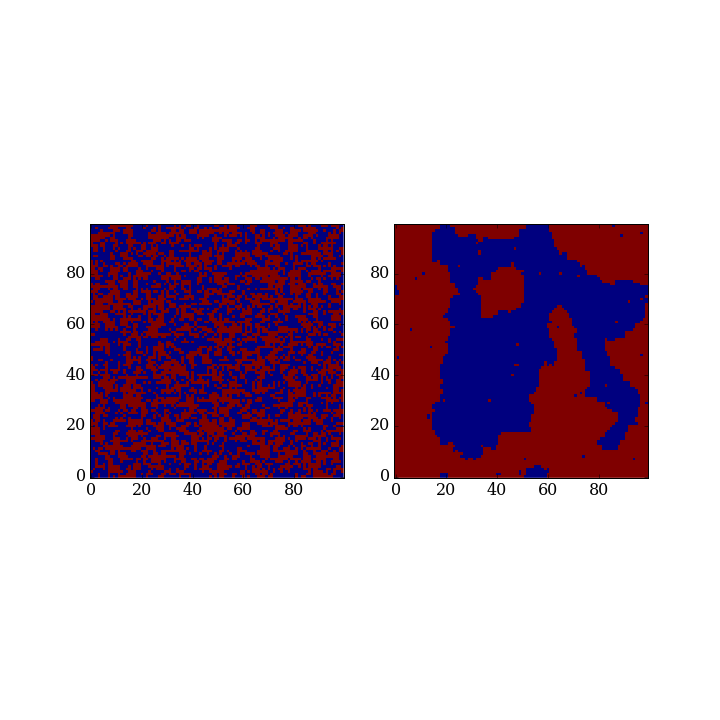
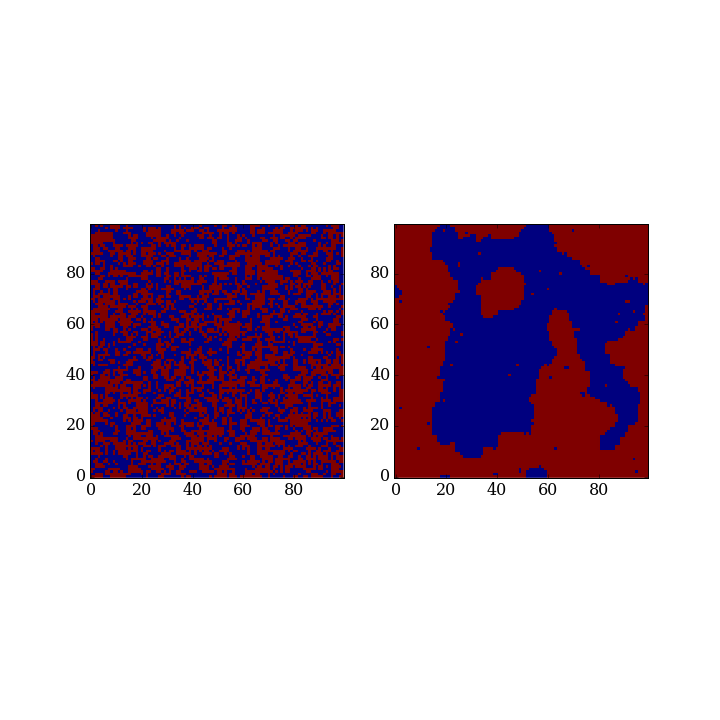
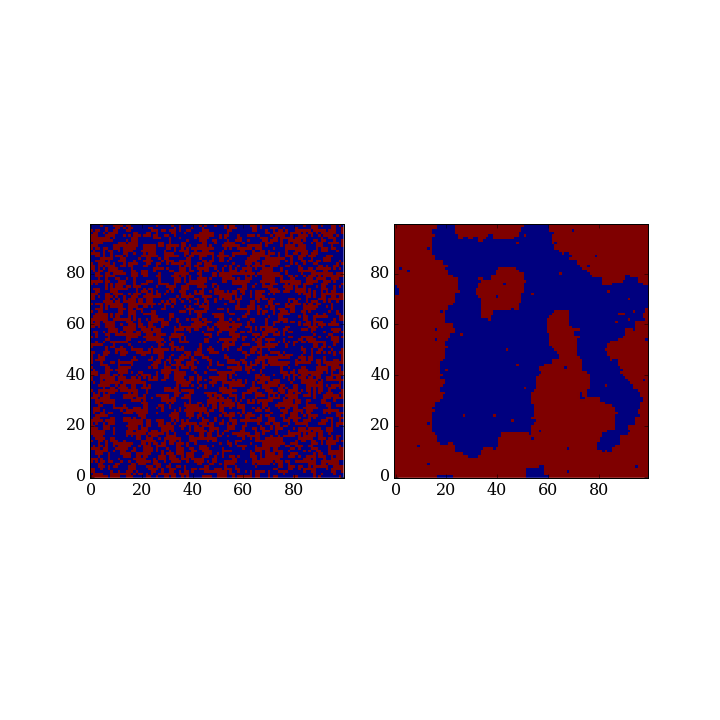
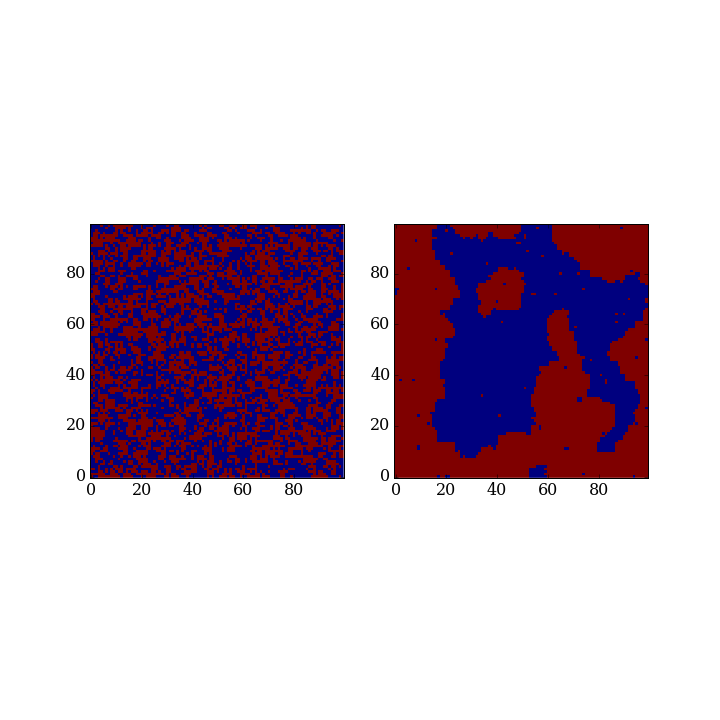
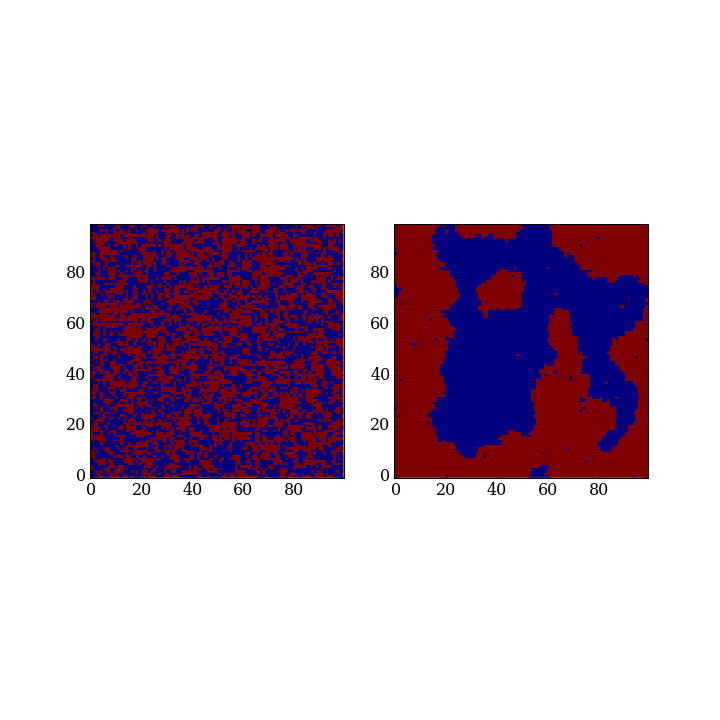
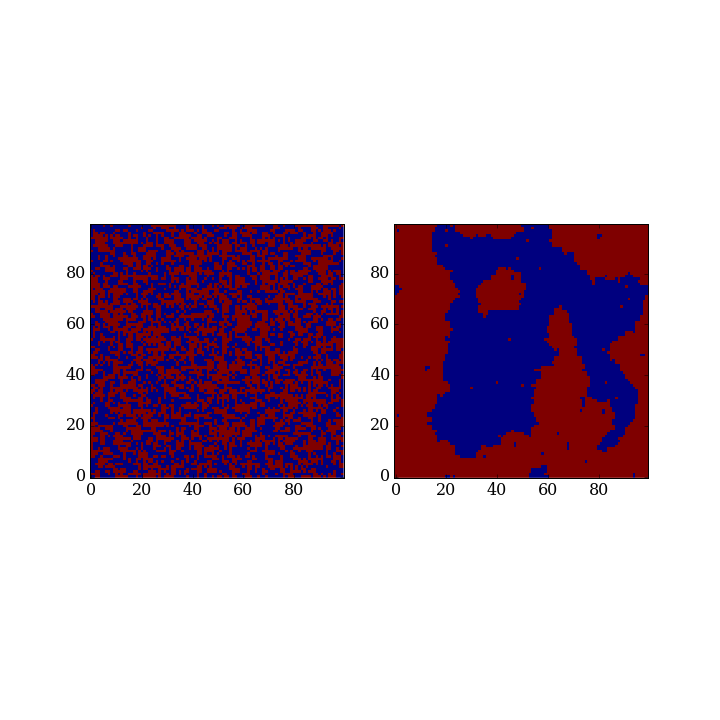
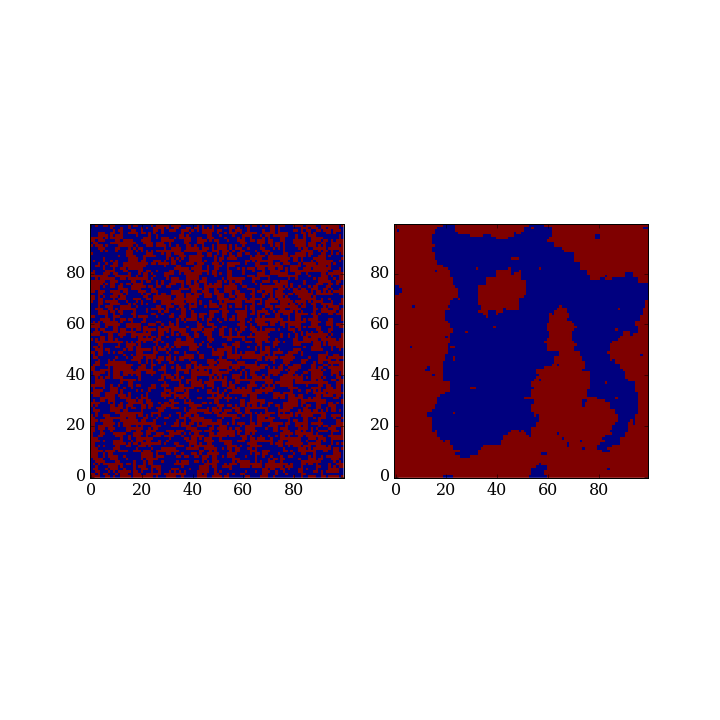
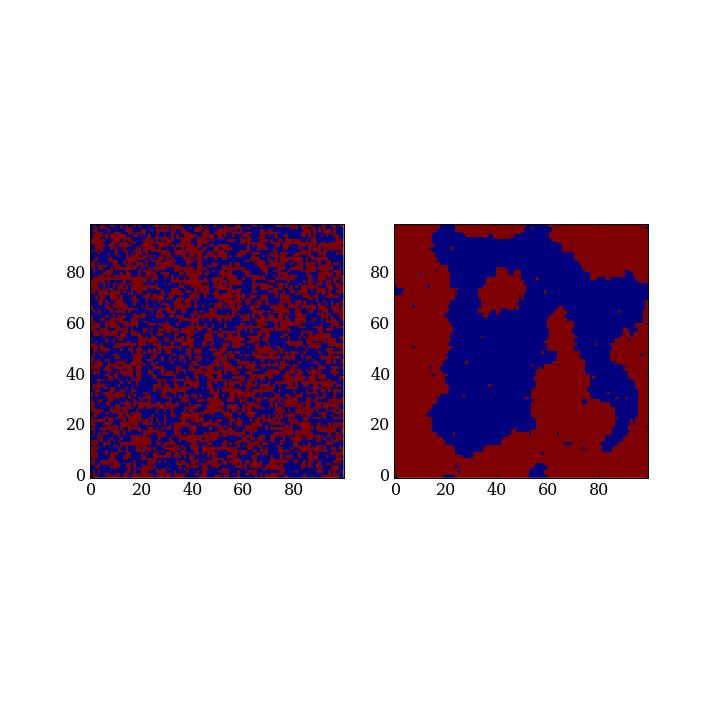
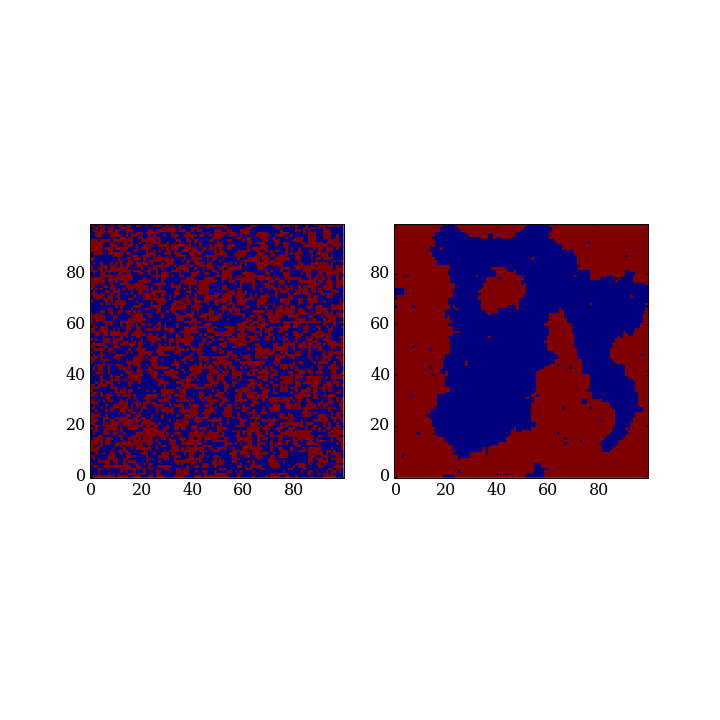
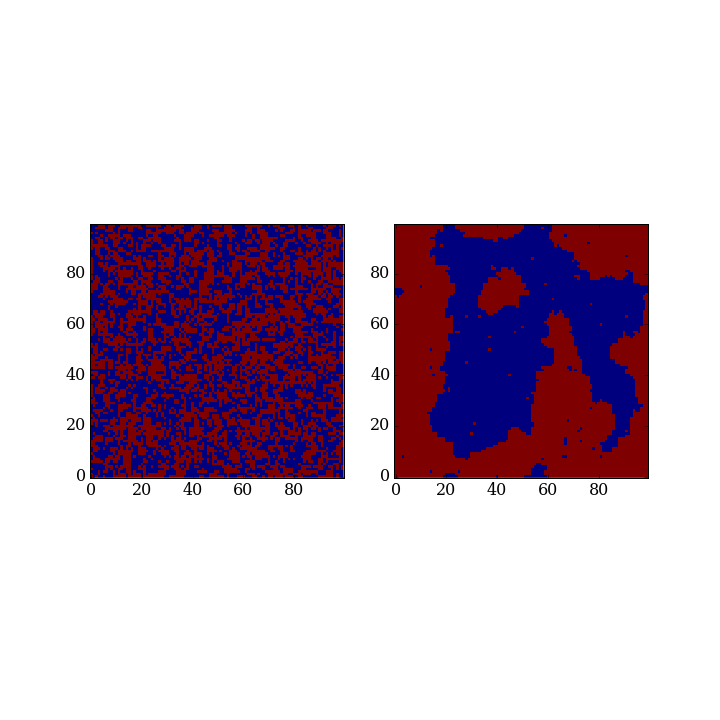
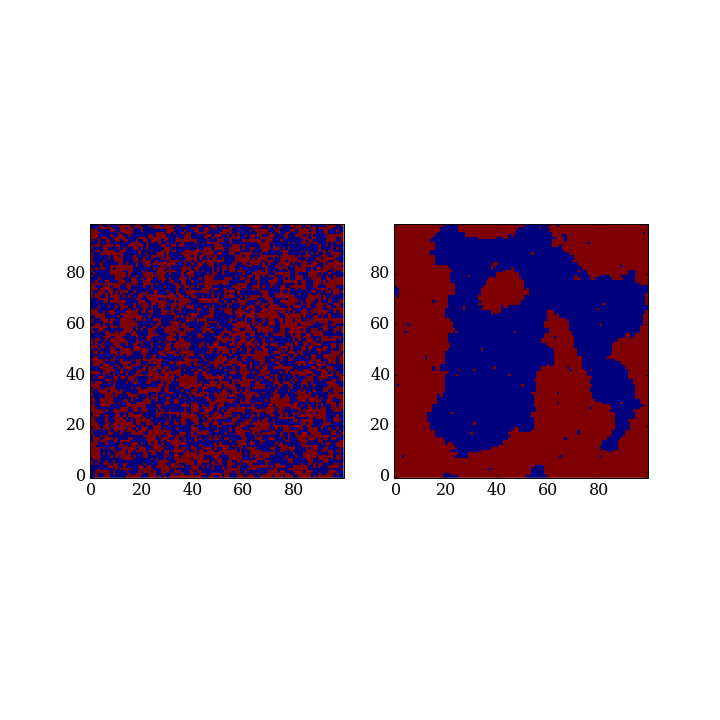
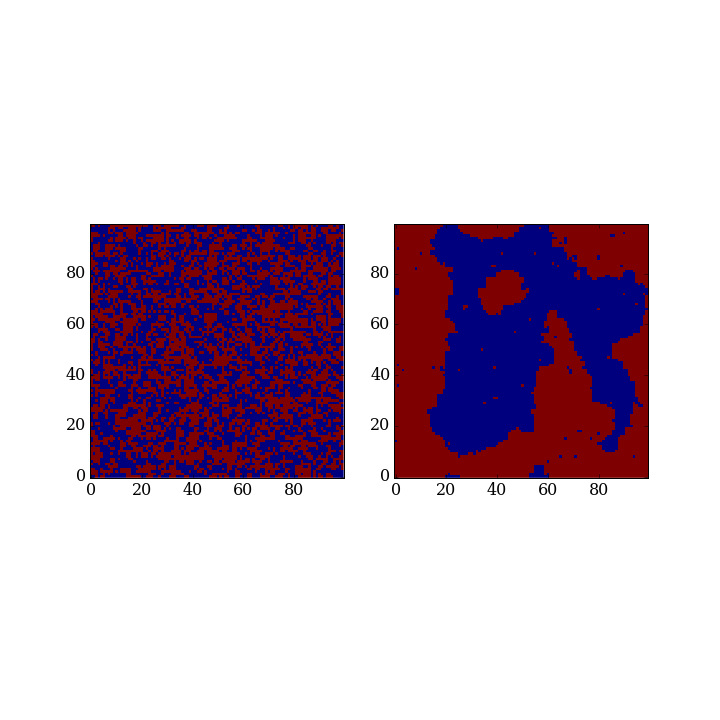

In [14]:
fig = pyplot.figure(figsize=(10,10))
pyplot.subplot(1, 2, 1)
img1 = pyplot.imshow(states_0_2[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

pyplot.subplot(1, 2, 2)
img2 = pyplot.imshow(states_0_7[0],interpolation="none",origin='lower',vmin=-1, vmax=1)

def animate(i):
    img1.set_array(states_0_2[i])
    img2.set_array(states_0_7[i])

animation.FuncAnimation(fig, animate, frames=NMC, interval=200)

Alors que pour le cas $\alpha = 0.2$ les spins évoluent de manière aléatoire, pour $\alpha = 0.7$, on remarque que les spins down se regroupent progressivement afin d'occuper certaines zones de manière aléatoire entourés de spins up.